# Exploratory Data Analysis

In [1]:
!python -m spacy download es_core_news_sm
#Despues de instalar reiniciar entorno! ANTES DE COMENZAR EN COLAB!!

     |████████████████████████████████| 16.2MB 8.9MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp37-none-any.whl size=16172936 sha256=ba943a2663cb2a7f0f56863bb92dea08e808d162d427f802f683c0ea6baf0448
  Stored in directory: /tmp/pip-ephem-wheel-cache-lkwec38d/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from unicodedata import normalize

!pip install emoji
import emoji
#Todo corre bien con: emoji in /usr/local/lib/python3.7/dist-packages version (1.2.0)

from collections import Counter

sns.set()

     |████████████████████████████████| 133kB 7.2MB/s 


In [ ]:
data = pd.read_json('dataset_es_train.json', lines= True)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [ ]:
print('Tamaño del dataset: ' + str(data.shape))
data = data.drop_duplicates()
print('Tamaño del dataset luego de drop_duplicates: ' + str(data.shape))

Tamaño del dataset: (200000, 8)
Tamaño del dataset luego de drop_duplicates: (200000, 8)


No hay instancias repetidas.

In [ ]:
# pasamos el dataset por una función para reducir el espacio en memoria
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
data = reduce_mem_usage(data, verbose = True)

Memory usage after optimization is: 12.40 MB
Decreased by 9.7%


In [ ]:
data.shape

(200000, 8)

In [ ]:
data.sample(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
5644,es_0002172,product_es_0642415,reviewer_es_0026965,1,Me llegó en un paquete forrado con cinta aisla...,Mal envoltorio y madera de arriba rota,es,furniture
89428,es_0153667,product_es_0926366,reviewer_es_0157737,3,No se li aguantarà porque es de plastico. Me p...,Teneis que pedir dos.,es,automotive
191855,es_0274285,product_es_0637647,reviewer_es_0061465,5,"Funciona perfecto, carga bien y el cable es largo",Buena compra,es,pc
168122,es_0030239,product_es_0625126,reviewer_es_0477013,5,Me ha gustado mucho el producto por el precio ...,Gran producto a un precio muy bueno,es,drugstore
195311,es_0880456,product_es_0670390,reviewer_es_0363735,5,"Muy contento con el producto, la batería dura ...",cómodo y silencioso,es,wireless
32533,es_0406494,product_es_0233368,reviewer_es_0436999,1,Me ha salido malísimos. En un puesta y ya se l...,Muy malos,es,jewelry
19630,es_0197278,product_es_0292540,reviewer_es_0446745,1,"Llevo años usando un 6100 de los antiguos, lo ...",no funciona correctamente es peor que el antiguo,es,wireless
91163,es_0296833,product_es_0537427,reviewer_es_0117546,3,"El dispositivo funciona perfectamente, el calo...","Funciona, pero vino abollado en la superficie",es,electronics
186735,es_0077176,product_es_0545059,reviewer_es_0552163,5,"Llevaba detrás de este producto varios meses, ...",Muy buena compra,es,electronics
117055,es_0696947,product_es_0397196,reviewer_es_0037848,3,"Le bajo una estrella ya wue, después de varios...",La correa pobre en calidad,es,sports


**Language:**

In [ ]:
data.language.value_counts()

es    200000
Name: language, dtype: int64

Todas las reviews son en español. Drop columna language a continuación:

In [ ]:
data = data.drop('language', axis=1)

**Stars y Product Category:**

In [ ]:
data.stars.value_counts()

5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64

 El dataset esta equilibrado en stars, habiendo cuarenta mil reseñas para cada cantidad. La variable target toma valores naturales entre 1 y 5.


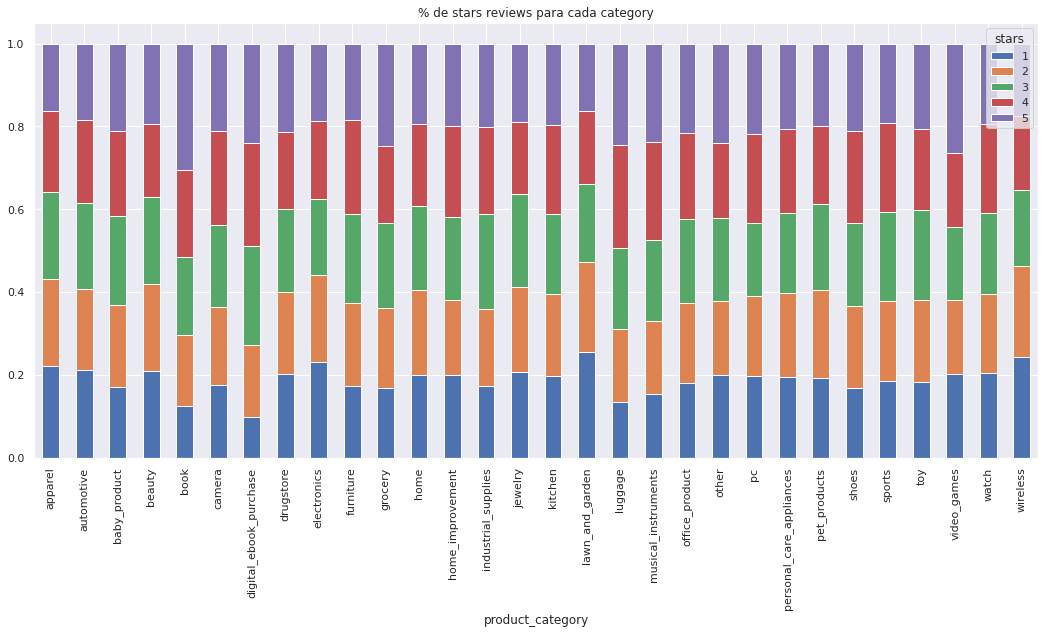

In [ ]:
#plt.figure(figsize=(14,8))
data_stars_pct = (data.groupby(['product_category','stars'])['stars'].count()/data.groupby(['product_category'])['stars'].count())
data_stars_pct.unstack().plot.bar(stacked=True, figsize=(18, 8), title = '% de stars reviews para cada category');

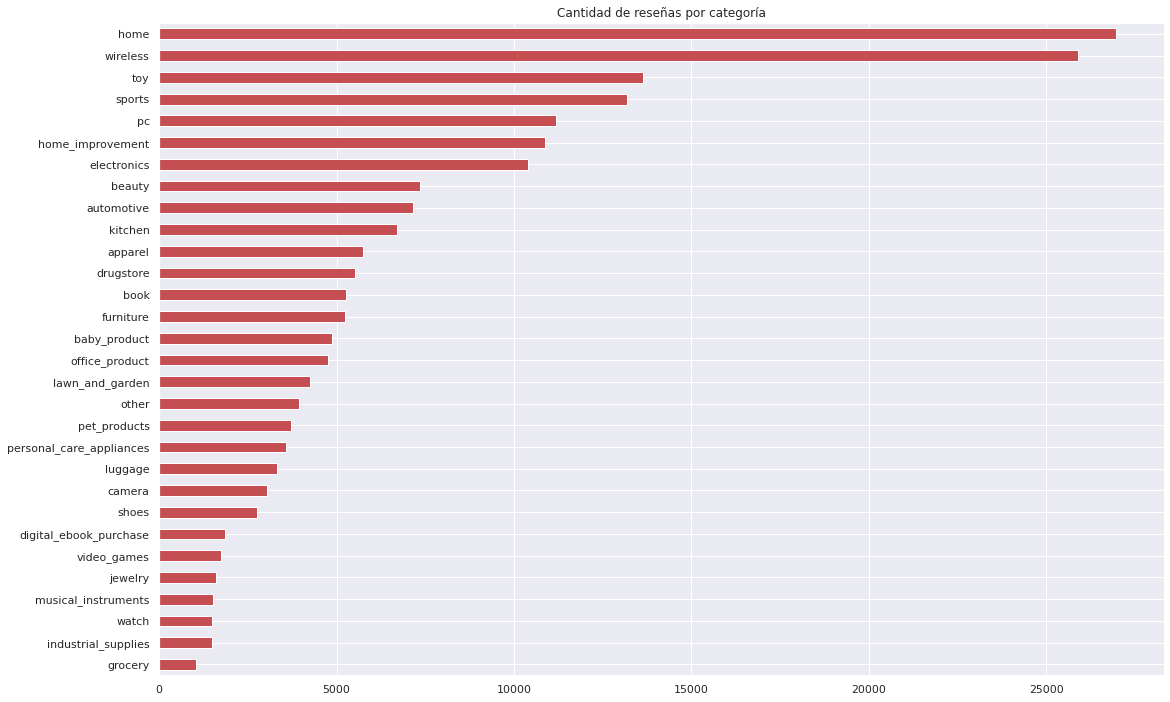

In [ ]:
plt.figure(figsize=(18,12))
data.product_category.value_counts().sort_values().plot(kind='barh', color='r')
plt.title('Cantidad de reseñas por categoría')
plt.show()


In [ ]:
data.product_category.value_counts().sort_values(ascending=False)

home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490
industrial_supplies          1482
grocery       

Hay 30 categorias con la disrtribución mostrada previamente.

**Review Id:**

In [ ]:
(data.review_id.str[:3]=='es_').sum()

200000

Todos los review_id comienzan con 'es_'. Descartamos estos caractéres:

In [ ]:
data.review_id = data.review_id.str[3:]

In [ ]:
data.review_id.value_counts().describe()

count    200000.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: review_id, dtype: float64

Todas las reviews tienen disitnto número de review_id. El review_id no aporta a los modelos de ML. Descartamos esta columna:

In [ ]:
data = data.drop('review_id', axis=1)

**Product Id:**

In [ ]:
(data.product_id.str[:11]=='product_es_').sum()

200000

Todos los product_id comienzan con 'product_es_'. Descartamos estos caractéres:

In [ ]:
data.product_id = data.product_id.str[11:]

In [ ]:
data.product_id.value_counts().describe()

count    150938.000000
mean          1.325047
std           0.633804
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: product_id, dtype: float64

Hay 150938 productos en las 200000 reviews. Hay productos que tienen hasta 8 reviews.

In [ ]:
data.product_id.describe(include=all)

count      200000
unique     150938
top       0261843
freq            8
Name: product_id, dtype: object

Hacemos un pequeño análisis de la relación entre la cantidad de reseñas y las stars obtenidas por producto. Intentamos ver si en los productos en los que hay más de 4 reseñas las diferentes valoraciones son o no similares entre sí.

In [ ]:
data.product_id.value_counts()

0261843    8
0741712    7
0087077    7
0808483    7
0393632    7
          ..
0071105    1
0220766    1
0246588    1
0870453    1
0077201    1
Name: product_id, Length: 150938, dtype: int64

Miramos en el único producto que tuvo 8 reviews:

In [ ]:
data.loc[data['product_id'] == '0261843']

,product_id,reviewer_id,stars,review_body,review_title,product_category
11612,0261843,reviewer_es_0855637,1,No son las canicas de la foto. Son pequeñas y ...,Decepcion,toy
27746,0261843,reviewer_es_0782745,1,"El producto aún no ha llegado, tenía que llega...",Estafa,toy
38929,0261843,reviewer_es_0634470,1,"Una pena, las canicas son muy cutres, lo único...",Canicas todo a 100,toy
67287,0261843,reviewer_es_0978294,2,Son caras y vienen muchas repetidas y ROTAS. L...,Rotas representante y caras. Vete al chino que...,toy
95799,0261843,reviewer_es_0981219,3,"Han venido unas pocas rotas, como son tantas n...",Algunas rotas,toy
124428,0261843,reviewer_es_0948003,4,Ha sido un regalo para un niño de 6 años y le ...,Bueno,toy
136414,0261843,reviewer_es_0000856,4,Buen producto...pero se ve que se había caído ...,Un juguete retro muy logrado.,toy
156144,0261843,reviewer_es_0978422,4,Excelente producto. Ideal para regalo a los má...,Excelente presentación,toy


El promedio de stars para el producto 0261843, es 2.5:

In [ ]:
data.loc[data['product_id'] == '0261843'].stars.mean()

2.5

Miramos el promedio de stars agrupando por product_id:

In [ ]:
p_df = data.product_id.groupby([data['product_id']]).count().astype(int).reset_index(name='Cant_reviews')
p_df['mean_stars'] = data.stars.groupby([data['product_id']]).mean().values.astype(float)
p_df

,product_id,Cant_reviews,mean_stars
0,0000005,1,2.000000
1,0000010,1,3.000000
2,0000014,1,2.000000
3,0000017,2,1.500000
4,0000019,1,1.000000
...,...,...,...
150933,0999984,3,2.666667
150934,0999985,1,5.000000
150935,0999988,2,4.000000
150936,0999992,2,1.500000


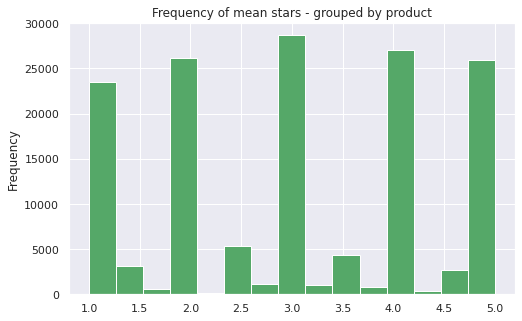

In [ ]:
p_df.mean_stars.plot.hist(bins=15, title='Frequency of mean stars - grouped by product', figsize=(8,5), color = 'g');

Los productos que tienen 5 stars de promedio se distribuyen según cantidad de reviews con los siguientes valores:

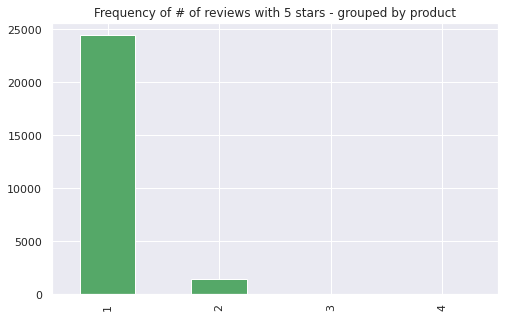

In [ ]:
p_df.loc[p_df.mean_stars == 5.0].Cant_reviews.value_counts().plot(kind='bar', title='Frequency of # of reviews with 5 stars - grouped by product', figsize=(8,5), color='g');

La mayoria de los productos que tienen 5 stars de promedio recibieron una sola review.

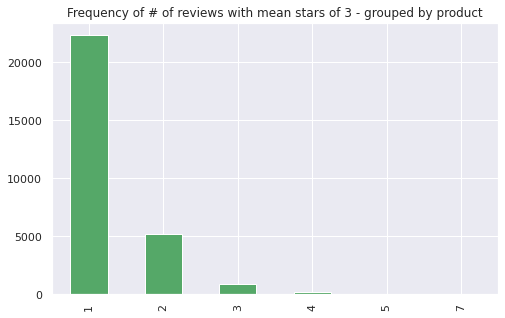

In [ ]:
p_df.loc[p_df.mean_stars == 3.0].Cant_reviews.value_counts().plot(kind='bar', title='Frequency of # of reviews with mean stars of 3 - grouped by product', figsize=(8,5), color='g');

No vemos una relación entre la cantidad de reviews para un mismo producto y sus valoraciones.

In [ ]:
p_df.Cant_reviews.value_counts()

1    112900
2     29260
3      6945
4      1481
5       305
6        34
7        12
8         1
Name: Cant_reviews, dtype: int64

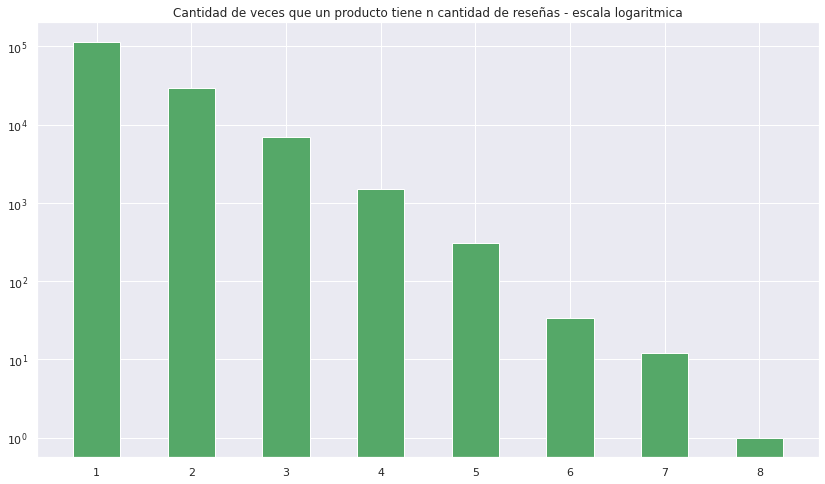

In [ ]:
plt.figure(figsize=(14,8))
plt.bar(range(1,9),p_df.Cant_reviews.value_counts(), width=0.5, color= 'g')
plt.yscale('log')
plt.title('Cantidad de veces que un producto tiene n cantidad de reseñas - escala logaritmica')
plt.show()

**Reviewer_id:**

In [ ]:
(data.reviewer_id.str[:12]=='reviewer_es_').sum()

200000

In [ ]:
data.reviewer_id = data.reviewer_id.str[12:]

In [ ]:
data.reviewer_id.value_counts().describe()

count    179076.000000
mean          1.116844
std           0.377380
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: reviewer_id, dtype: float64

Agrupamos por reviwer_id y realizamos un análisis similar al anterior:

In [ ]:
r_df = data.reviewer_id.groupby([data['reviewer_id']]).count().astype(int).reset_index(name='Cant_reviews')
r_df['mean_stars'] = data.stars.groupby([data['reviewer_id']]).mean().values.astype(float)
r_df

,reviewer_id,Cant_reviews,mean_stars
0,0000000,1,2.0
1,0000013,1,2.0
2,0000014,1,5.0
3,0000015,1,5.0
4,0000016,1,3.0
...,...,...,...
179071,0999964,1,2.0
179072,0999971,1,5.0
179073,0999977,1,1.0
179074,0999978,1,5.0


Estudiamos cantidad de reseñas realizadas por el mismo consumidor:

In [ ]:
r_df.Cant_reviews.value_counts()

1    161143
2     15386
3      2166
4       329
5        44
6         5
7         3
Name: Cant_reviews, dtype: int64

Miramos el promedio de stars enter los reviewers que realizaron 7, 6 o 5 reviwes respectivamente:

In [ ]:
print('Promedio de stars para los reviewers que realizaron 7 reseñas:')
r_df.loc[r_df.Cant_reviews == 7].mean_stars

Promedio de stars para los reviewers que realizaron 7 reseñas:


77459     3.000000
78649     3.142857
105619    3.285714
Name: mean_stars, dtype: float64

In [ ]:
print('Promedio de stars para los reviewers que realizaron 6 reseñas:')
r_df.loc[r_df.Cant_reviews == 6].mean_stars

Promedio de stars para los reviewers que realizaron 6 reseñas:


6573      3.166667
76308     2.166667
118315    2.166667
123978    2.333333
172082    3.000000
Name: mean_stars, dtype: float64

In [ ]:
print('Promedio de stars para los reviewers que realizaron 5 reseñas:')
r_df.loc[r_df.Cant_reviews == 5].mean_stars

Promedio de stars para los reviewers que realizaron 5 reseñas:


2263      2.4
4453      2.0
5803      2.0
12435     3.2
12672     3.2
12998     1.8
16239     4.0
24216     3.8
24636     3.2
40461     2.4
44415     3.2
48550     3.6
55236     3.0
55430     2.6
58053     1.8
72855     2.0
74770     3.6
74969     3.0
81753     2.6
84097     2.4
85300     2.0
86770     2.4
89414     3.4
95100     2.8
95120     3.0
95421     2.8
97263     2.8
101681    1.6
110732    2.8
113498    2.2
114689    3.0
117267    3.2
118792    3.2
120062    3.2
136543    3.4
138206    2.4
143432    3.4
147141    2.8
147357    2.8
147363    2.6
161343    2.8
167569    3.0
167710    3.6
170097    2.0
Name: mean_stars, dtype: float64

Vemos que los promedios de stars entre los reviewers que realizaron 5 o más reviews varian entre 2 y 4 stars. Podemos concluir que no encontramos *haters* o *lovers*, es decir usuarios cuyo comportamiento sea constante (tanto para dar 1 star o 5 stars).

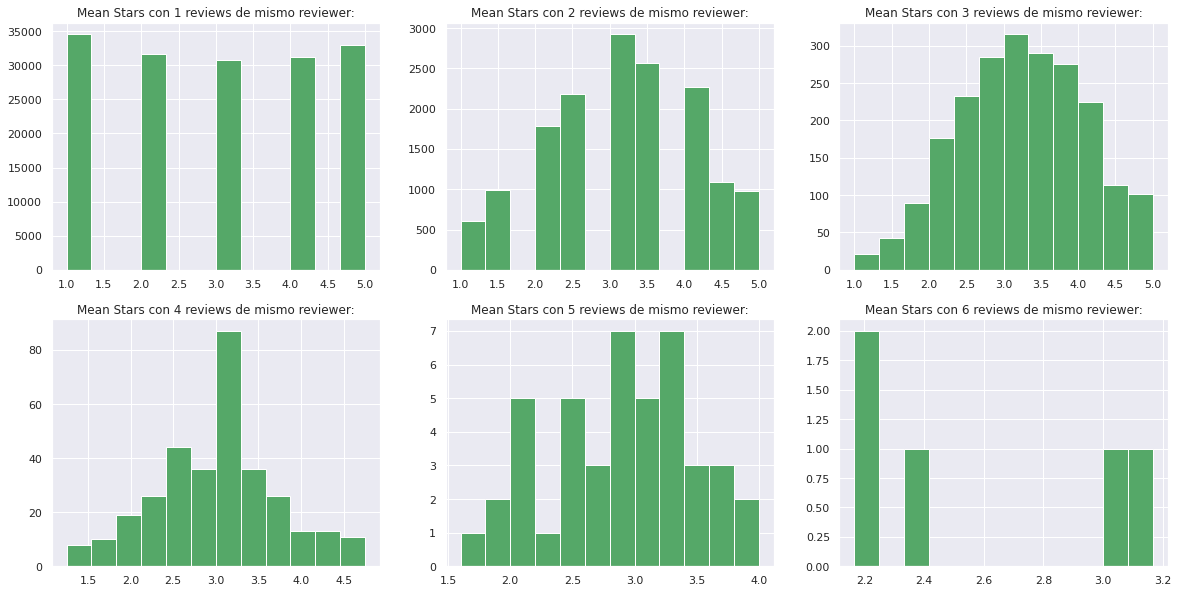

In [ ]:
plt.figure(figsize = (20,10))
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.hist(r_df.loc[r_df.Cant_reviews == i].mean_stars, bins = 12, color = 'g')
    plt.title('Mean Stars con '+ str(i) +' reviews de mismo reviewer:')
    #plt.xlabel('Mean Stars')
plt.show()

Mirando las escalas de los ejes horizontales en estos gráficos vemos que los promedios se concentran en 3, salvo para el primero de los plots que representa una única review por reviewer. En este gráfico vemos que la cantidad de reviews se equidistribuye entre 1 y 5 stars.

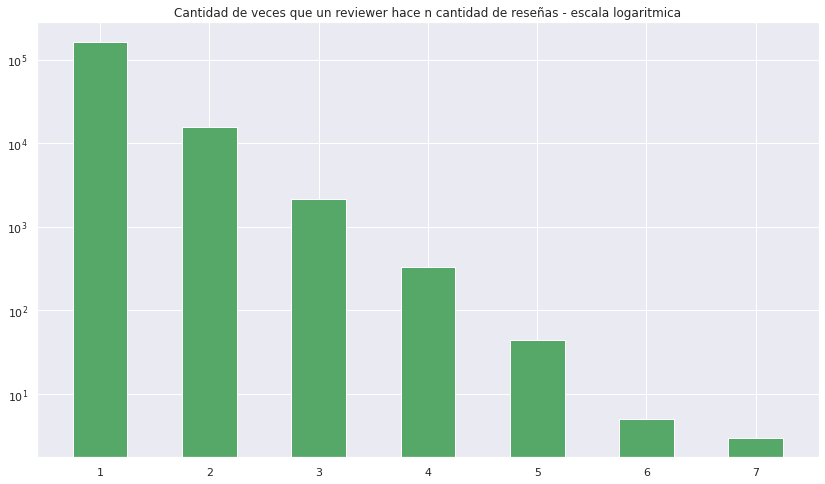

In [ ]:
plt.figure(figsize=(14,8))
plt.bar(range(1,8),r_df.Cant_reviews.value_counts(),width=0.5, color = 'g')
plt.yscale('log')
plt.title('Cantidad de veces que un reviewer hace n cantidad de reseñas - escala logaritmica')
plt.show()

**Valores faltantes:**

In [ ]:
#Chequeamos valores faltantes
data.isna().sum()

product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
product_category    0
dtype: int64

No hay valores faltantes.

## Text & Body

**Miramos un ejemplos:** abrimos las columnas de texto review_title y review_body. Comenzamos mirando la primera fila.

In [ ]:
data.review_body[0]

'Nada bueno se me fue ka pantalla en menos de 8 meses y no he recibido respuesta del fabricante'

In [ ]:
data.review_title[0]

'television Nevir'

In [ ]:
data.stars[0]

1

Construimos una única columna juntando el title con el body en un mismo string.

In [ ]:
data['text'] = data.review_title + '. ' + data.review_body

In [ ]:
data.text[0]

'television Nevir. Nada bueno se me fue ka pantalla en menos de 8 meses y no he recibido respuesta del fabricante'

### Caracteres especiales

Sacamos caracteres espaciales como acentos, diéresis, virgulillas (mantenemos ñ), etc. Pasamos todo a letra minuscula. El siguiente bloque de código realiza lo descripto en un ejemplo.

In [ ]:
import re
from unicodedata import normalize

In [ ]:
def no_acentos(frase):
    # -> NFD y eliminar diacríticos
    frase_sin = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", frase), 0, re.I
        )

    # -> NFC
    return normalize( 'NFC', frase_sin).lower()

Mostramos un ejemplo aplicando la función no_acentos:

In [ ]:


print(no_acentos('Pingüino: Málãgà ês uñ̺ã cíudãd fantástica y èn Logroño me pica el... moñǫ̝̘̦̞̟̩̐̏̋͌́ͬ̚͡õ̪͓͍̦̓ơ̤̺̬̯͂̌͐͐͟o͎͈̳̠̼̫͂̊'))



pinguino: malaga es una ciudad fantastica y en logroño me pica el... moñoooo


In [ ]:
data['text'] = data['text'].apply(no_acentos)

In [ ]:
data.text

0         television nevir. nada bueno se me fue ka pant...
1         dinero tirado a la basura con esta compra. hor...
2         solo llega una unidad cuando te obligan a comp...
3         producto no recibido.. no entro en descalifica...
4            devuelto. llega tarde y co la talla equivocada
                                ...                        
199995    tal y como se describe. mando funciona perfect...
199996    funciona perfectamente. compre la bateria con ...
199997    buena calidad.. buena calidad. satisfecha con ...
199998      recomendado. perfecto para el cumple de mi hijo
199999    preciosas. super bien! las brochas son buenas,...
Name: text, Length: 200000, dtype: object

In [ ]:
data.tail()


,product_id,reviewer_id,stars,review_body,review_title,product_category,text
199995,0317036,0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,electronics,tal y como se describe. mando funciona perfect...
199996,0622919,0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,electronics,funciona perfectamente. compre la bateria con ...
199997,0358101,0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,apparel,buena calidad.. buena calidad. satisfecha con ...
199998,0788855,0694290,5,Perfecto para el cumple de mi hijo,Recomendado,toy,recomendado. perfecto para el cumple de mi hijo
199999,0378794,0141717,5,"Súper bien! Las brochas son buenas, no sé meno...",Preciosas,home,"preciosas. super bien! las brochas son buenas,..."


### Emojis! :)

**Todo corre bien con: emoji in /usr/local/lib/python3.7/dist-packages version (1.2.0)**

In [ ]:
emoji.UNICODE_EMOJI.keys()

dict_keys(['en', 'es', 'pt', 'it'])

In [ ]:
from collections import Counter

Analizamos cuales y cuantos emojis hay en el corpus:

In [ ]:
emojis_df=[]
for string in data['text']:
    my_str = str(string)
    for each in my_str:
        if each in emoji.UNICODE_EMOJI['es']:
            emojis_df.append(each)

freq = dict(Counter(i for sub in emojis_df for i in set(sub))) 
sort_orders = sorted(freq.items(), key=lambda x: x[1], reverse=True)

In [ ]:
new_dict = {}
for (key, value) in freq.items():
    if value > 3:
          new_dict[key] = value

In [ ]:
sorted(new_dict.items(), key=lambda x: x[1], reverse=True)[0:15]

[('👍', 175),
 ('👎', 93),
 ('😡', 75),
 ('🏻', 69),
 ('👌', 60),
 ('😊', 49),
 ('😉', 47),
 ('😔', 46),
 ('🏼', 46),
 ('😂', 46),
 ('😍', 41),
 ('😁', 35),
 ('👏', 34),
 ('😠', 29),
 ('🤷', 26)]

**Pulgar up y pulgar down**

In [ ]:
data['pulgar_up'] = data['text'].map(lambda x: True if '👍' in x else False)

In [ ]:
data.pulgar_up.value_counts()

False    199861
True        139
Name: pulgar_up, dtype: int64

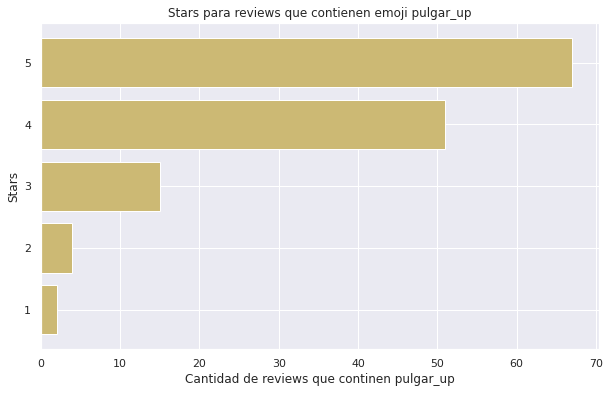

In [ ]:
plt.figure(figsize = (10,6))
plt.barh(range(5,0,-1), data[data['pulgar_up'] == True].stars.value_counts(), color = 'y')
plt.title('Stars para reviews que contienen emoji pulgar_up')
plt.xlabel('Cantidad de reviews que continen pulgar_up')
plt.ylabel('Stars')
plt.show()

In [ ]:
data['pulgar_down'] = data['text'].map(lambda x: True if '👎' in x else False)

In [ ]:
data[data['pulgar_down'] == True].stars.value_counts()

1    34
2    19
3     9
4     2
5     1
Name: stars, dtype: int64

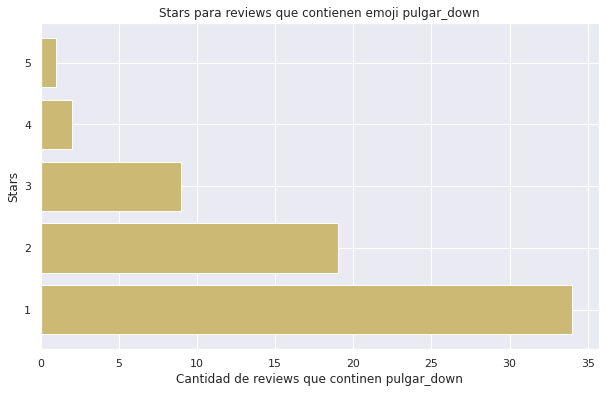

In [ ]:
plt.figure(figsize = (10,6))
plt.barh(range(1,6), data[data['pulgar_down'] == True].stars.value_counts(), color = 'y')
plt.title('Stars para reviews que contienen emoji pulgar_down')
plt.xlabel('Cantidad de reviews que continen pulgar_down')
plt.ylabel('Stars')
plt.show()

In [ ]:
data = data.drop(['pulgar_up', 'pulgar_down'], axis = 1)

In [ ]:
data.head()

,product_id,reviewer_id,stars,review_body,review_title,product_category,text
0,0296024,0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,television nevir. nada bueno se me fue ka pant...
1,0922286,0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,dinero tirado a la basura con esta compra. hor...
2,0474543,0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,solo llega una unidad cuando te obligan a comp...
3,0656090,0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,producto no recibido.. no entro en descalifica...
4,0662544,0224827,1,Llega tarde y co la talla equivocada,Devuelto,shoes,devuelto. llega tarde y co la talla equivocada


Si bien son pocas reseñas con emojis, vemos una clara correlación entre el valor de stars con el significado de los emojis que contienen. Reemplazamos los emojis del corpus por su significado en español. Por ejemplo:



*   😡 cambiara a 'cara cabreada'
*   🤷🏼 cambiara a 'persona encogida de hombros'



In [ ]:
print('Cantidad de emojis en el corpus:')
sum(freq.values())

Cantidad de emojis en el corpus:


1409

**Algunos ejemplos:**

In [ ]:
for i, st in enumerate(data.text):
    if '😡' in st and i < 10000:
        print(i, st)

164 oscar. como voy a valorar un producto que aun no he recibido, es de verguenza 😡 un mes que a pasado
457 maz. mala experiencia... pedi el producto con entrega garantizada entre el 15 y el 30 de noviembre... al final a pasado el bautizo y no me han llegado.. aun sigo esperando! 😡
896 muy mal empaquetado. muy bonito, pero mal embalado el paquete, sin proteccion ninguna, y la sombra de ojos viene rota 😡
2469 diana gallego. nada que ver con lo que la describen, es fatal y las varillas hacen daño 😡 en la parte de las espalda se dobla hacia arriba y se hace una bomba la hemos probado en una chica delgada y en una de talla algo mas grande y hace lo mismo en ambas , es un desastre
2750 no cumple los plazos de entrega. lo pedi hace un mes con amazon prime, me iba a llegar el 17 de diciembre pues lo necesito para noche buena. todavia no me ha llegado aunque dice que ya ha sido entregado 😡
2969 no lo recibido 😡. no se si van bien o no ,no me ha llegado el pedido 😡
4040 un auricular no funciona

Miramos algunos ejemplos y reemplazamos los emojis por su significado en palabras:

Ejemplo 1:

In [ ]:
ej = data.text.iloc[5318]
ej

'mercedes. me mandaron un movil que ni se encendia 😡😡. no se si fue un problema de la tienda o del aparato . que decepcion !'

In [ ]:
emoji.UNICODE_EMOJI['es']['😡']

':cara_cabreada:'

In [ ]:
for each in ej:
    if each in emoji.UNICODE_EMOJI['es']:
        ej = ej.replace(each, emoji.UNICODE_EMOJI['es'][each][1:-1] + ' ').replace('_', ' ')
ej        


'mercedes. me mandaron un movil que ni se encendia cara cabreada cara cabreada . no se si fue un problema de la tienda o del aparato . que decepcion !'

Ejemplo 2:

In [ ]:
ej2 = data.text.iloc[2324]
ej2

'roto. el espejo llego completamente roto. una lastima, a la basura 🤷🏼\u200d♀️'

In [ ]:
my_str = str(ej2)
for each in my_str:
    if each in emoji.UNICODE_EMOJI['es']:
        print(each)
        print(emoji.UNICODE_EMOJI['es'][each])

🤷
:persona_encogida_de_hombros:
🏼
:tono_de_piel_claro_medio:


In [ ]:
for each in ej2:
    if each in emoji.UNICODE_EMOJI['es']:
        ej2 = ej2.replace(each, emoji.UNICODE_EMOJI['es'][each][1:-1] + ' ').replace('_', ' ')
ej2

'roto. el espejo llego completamente roto. una lastima, a la basura persona encogida de hombros tono de piel claro medio \u200d♀️'

Lo aplicamos en toda la columna text:

In [ ]:
def no_emoji(frase):
    my_str = str(frase)
    for each in my_str:
        if each in emoji.UNICODE_EMOJI['es']:
            my_str = my_str.replace(each, emoji.UNICODE_EMOJI['es'][each][1:-1] + ' ').replace('_', ' ')
    return my_str        

In [ ]:
data.text = data['text'].apply(no_emoji)

In [ ]:
#Chequeamos que en la columna text efectivamente no hayan emojis!
#Esperamos obtener una lista vacia como muestra de que no quedaron emojis
sin_emojis=[]
for string in data['text']:
    my_str = str(string)
    for each in my_str:
        if each in emoji.UNICODE_EMOJI['es']:
            sin_emojis.append(each)
    
freq_sin = dict(Counter(i for sub in sin_emojis for i in set(sub))) 
sort_orders_sin = sorted(freq_sin.items(), key=lambda x: x[1], reverse=True)       
sort_orders_sin 

[]

In [ ]:
#Chequeamos en uno de los ejemplos previo
data.text.iloc[5318]

'mercedes. me mandaron un movil que ni se encendia cara cabreada cara cabreada . no se si fue un problema de la tienda o del aparato . que decepcion !'

## Nubes de palabras

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#nltk librería de análisis de lenguaje
import nltk
#Este proceso puede hacerse antes de forma manual, descargar las stopwords de la librería nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))
stop_words_sp.update(["br"])
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Sacamos algunas palabras del set stopword que queremos conservar en las reviews:
list_a_conservar=['no', 'tuvo', 'poco', 'nada', 'ni', 'mucho', 'muchos', 'contra']
for mant_palabra in list_a_conservar:
    stop_words_sp.discard(mant_palabra)

In [ ]:
stop_words_sp = [no_acentos(word) for word in stop_words_sp]

In [ ]:
stop_words_sp

['habeis',
 'estan',
 'ha',
 'con',
 'esteis',
 'las',
 'hubiesemos',
 'mi',
 'estuvierais',
 'os',
 'la',
 'esa',
 'tuvieran',
 'ya',
 'estuvieran',
 'se',
 'que',
 'tendre',
 'son',
 'seras',
 'esto',
 'tenidas',
 'este',
 'tu',
 'sentido',
 'todos',
 'habre',
 'vosotras',
 'habida',
 'tuvieseis',
 'tendremos',
 'habia',
 'fueses',
 'hubieras',
 'tuviesen',
 'tened',
 'por',
 'tengan',
 'estabais',
 'tienen',
 'tuviera',
 'uno',
 'tenian',
 'cuando',
 'estuviera',
 'suyas',
 'habrias',
 'sereis',
 'seamos',
 'estar',
 'le',
 'sentidas',
 'de',
 'tuvisteis',
 'a',
 'estos',
 'fuerais',
 'seria',
 'tenia',
 'sea',
 'estarian',
 'hayamos',
 'sere',
 'tienes',
 'esta',
 'seriais',
 'has',
 'hubo',
 'tuvierais',
 'nuestro',
 'el',
 'muy',
 'hemos',
 'haya',
 'habriais',
 'tenemos',
 'tuve',
 'habreis',
 'tenida',
 'tendra',
 'fuera',
 'tuviste',
 'tuvimos',
 'les',
 'ese',
 'tendriamos',
 'tu',
 'seriamos',
 'unos',
 'vuestras',
 'fueran',
 'somos',
 'estais',
 'porque',
 'seremos',
 'has

In [ ]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def nube_palabras(text, n):
    print ("Hay {} palabras en total en los textos de las reviews con {} estrellas".format(len(text.split(' ')), n))
    wordcloud = WordCloud(stopwords=stop_words_sp, background_color="black").generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Hay 1281687 palabras en total en los textos de las reviews con 1 estrellas


<Figure size 1440x720 with 0 Axes>

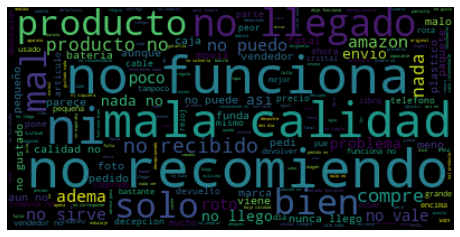

Hay 1400912 palabras en total en los textos de las reviews con 2 estrellas


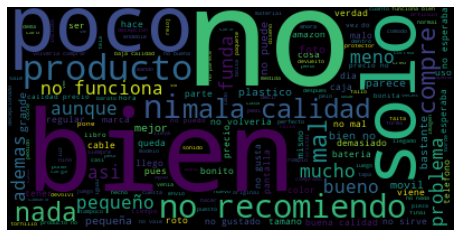

Hay 1291243 palabras en total en los textos de las reviews con 3 estrellas


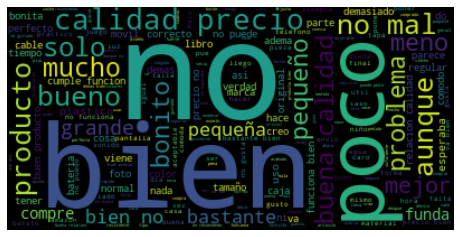

Hay 1158445 palabras en total en los textos de las reviews con 4 estrellas


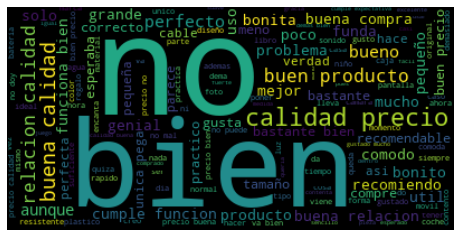

Hay 1096930 palabras en total en los textos de las reviews con 5 estrellas


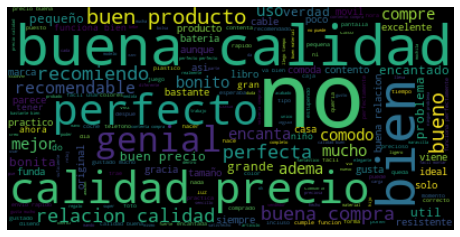

In [ ]:
plt.figure(figsize = (20,10))
for i in range(1,6):
  text = " ".join(x for x in data[data['stars']==i].text)
  nube_palabras(text, i)  

Vemos que a medida que avanzamos en cantidad de stars recibidas aparecen mas frecuentemente palabras como: 'perfecto', 'recomiendo', 'buen producto'. Contrariamente si miramos para 1 o 2 stars encontramos palabras como: 'no recomiendo' o 'mala calidad'. Notamos que la palabra 'no' tiene alta frecuencia en todos los word clouds. Estudiaremos este hecho en la próxima sección. 

## Frecuencia de palabras

Estudiamos la frecuencia de las palabras agrupando por stars (quitando stopwords previamente).

In [ ]:
import itertools

p = re.compile('\w+')

In [ ]:
def plot_frec(data_stars, i):
    todos = []
    for tit in data_stars.text:
        tit = tit.lower()
        tit = nltk.word_tokenize(tit) # Tokenizar con RegexpTokenizer
        tit = [ s for s in tit if p.match(s) ]
        tit = [word for word in tit if word not in stop_words_sp] # Filtrar por stopwords
        todos.append(tit) #agregar el resultado a la lista
    todos = list(itertools.chain(*todos))    
    freq = nltk.FreqDist(todos)
    df_freq = pd.DataFrame(freq.items(), columns=['Word', 'Frequency'])
    df_freq = df_freq.sort_values('Frequency', ascending=False)
    df_freq.reset_index(drop = True, inplace=True)
    plt.figure(figsize = (10,8))
    plot = sns.barplot(x = df_freq.iloc[:30].Frequency, y  = df_freq.iloc[:15].Word)
    for item in plot.get_xticklabels():
        item.set_rotation(90)
    plt.title('Frecuencia de palabras que más aparecen en las reseñas con {} estrellas'.format(i))    
    plt.show()
    return df_freq.iloc[:15].Word

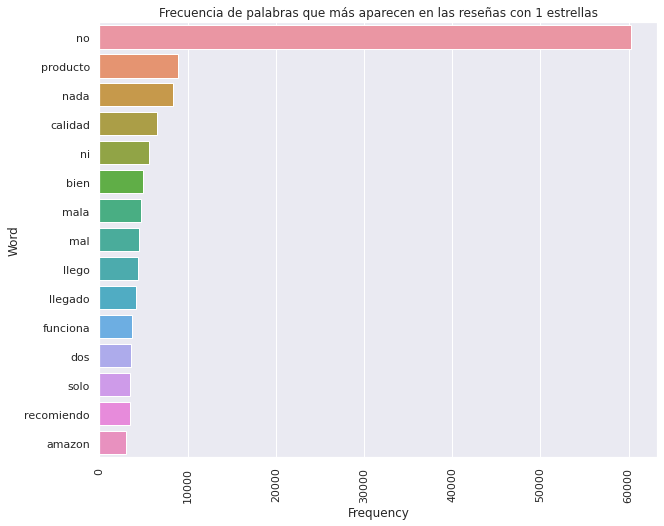

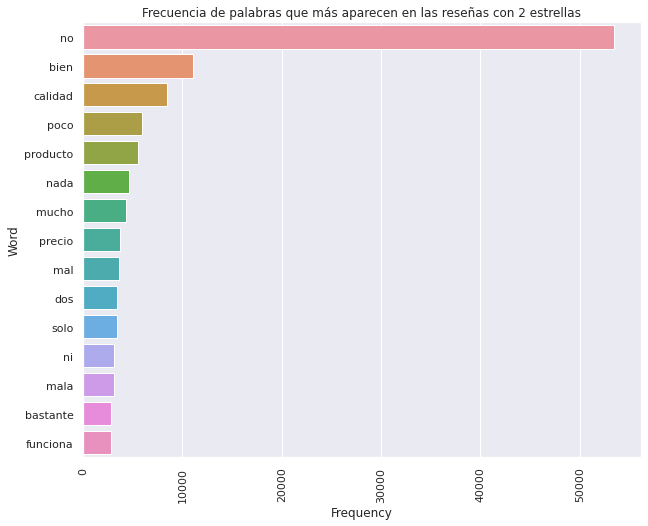

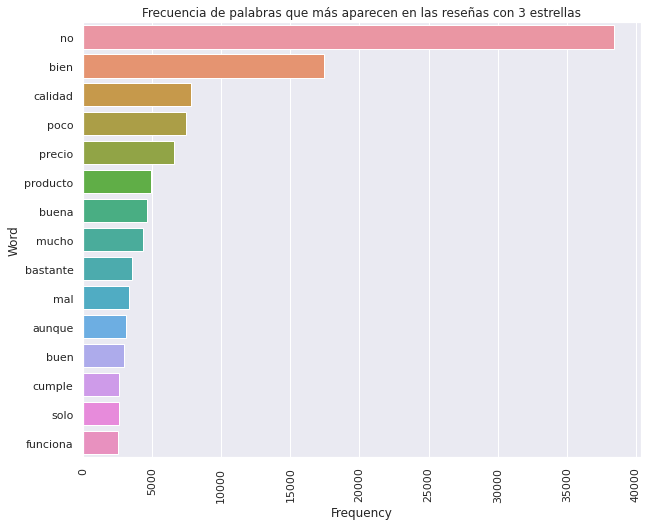

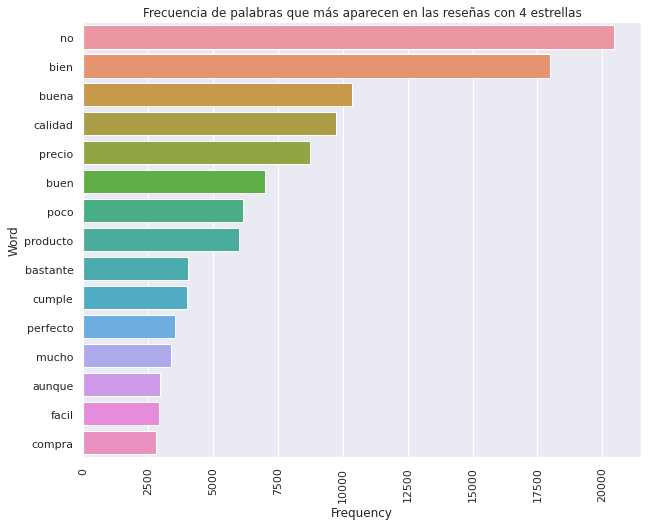

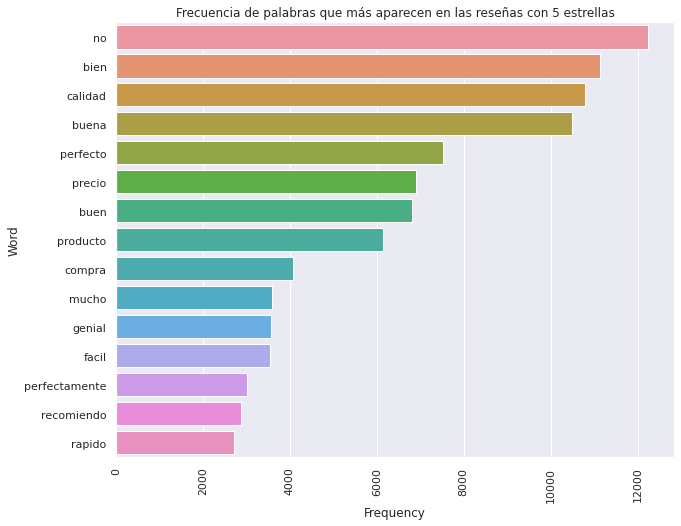

In [ ]:
most_frec_names_dict = {'star_1': '', 'star_2': '', 'star_3':'', 'star_4':'', 'star_5':''}
for i in range(1,6):
    data_stars = data[data.stars == i]
    most_frec_names_dict['star_'+str(i)] = plot_frec(data_stars, i)
 

Vemos en la siguiente tabla las primeras 15 palabras más frecuentes agrupando por stars.

In [ ]:
pd.DataFrame(most_frec_names_dict)

,star_1,star_2,star_3,star_4,star_5
0,no,no,no,no,no
1,producto,bien,bien,bien,bien
2,nada,calidad,calidad,buena,calidad
3,calidad,poco,poco,calidad,buena
4,ni,producto,precio,precio,perfecto
5,bien,nada,producto,buen,precio
6,mala,mucho,buena,poco,buen
7,mal,precio,mucho,producto,producto
8,llego,mal,bastante,bastante,compra
9,llegado,dos,mal,cumple,mucho


Aunque 'no' aparece siempre en primer lugar, podemos ver una diferencia en la cantidad de veces que aparece en cada grupo:



*   Stars_1: 60.000 veces 
*   Stars_2: 55.000 veces
*   Stars_3: 38.000 veces
*   Stars_4: 20.000 veces
*   Stars_5: 12.000 veces



## Length & feedback

Creamos una columna, **length** cuyo valor es la cantidad de palabras que tiene el campo text. Nos interesa estudiar si existe o no una relación entre la longitud del texto escrito y el valor de stars asignado. Nuestra hipótesis es que a menor valor de stars el texto es más largo.

In [ ]:
data['length'] = data['text'].apply(lambda x: x.split(' ')).apply(len)

In [ ]:
data['length'].describe()

count    200000.000000
mean         31.146085
std          24.819647
min           3.000000
25%          16.000000
50%          25.000000
75%          38.000000
max         566.000000
Name: length, dtype: float64

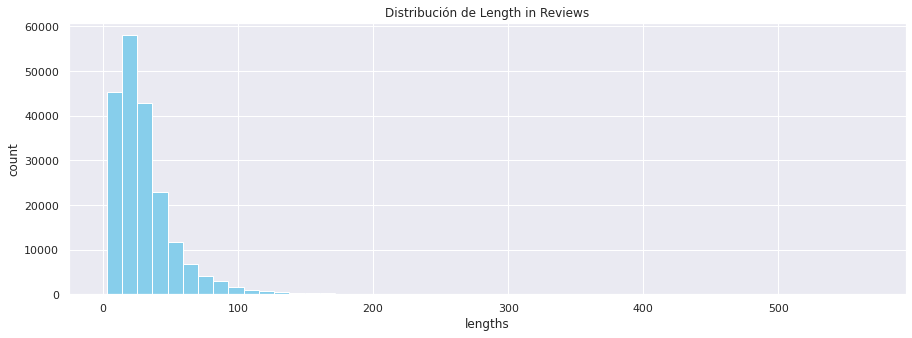

In [ ]:
#distribution of length:
data['length'].plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
plt.title('Distribución de Length in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

Definimos long_review aquellas con más de 100 palabras.

In [ ]:
data['long_review'] = data['length']>100
data['long_review'].sum()

4308

In [ ]:
df = data[data['length'] < 100]

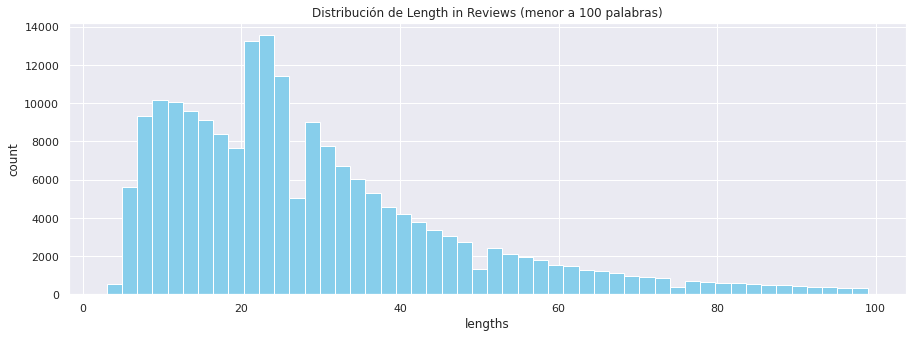

In [ ]:
#distribution of length:
df['length'].plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
plt.title('Distribución de Length in Reviews (menor a 100 palabras)')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

El diagrama de anterior muestra la distribución de la longitud de las reseñas. La mayoría de las reseñas (75%) son tan breves que solo duran menos de 38. Muy pocas personas escriben reseñas más largas, como de 90 a 100 palabras. Unas 4300 reseñas tienen una longitud mayor a 100 palabras. Una posible idea para minimizar la cantidad de palabras en el corpus podria ser eliminar estas reseñas que representan menos del 3% sobre el total de las mismas.

In [ ]:
data.head()

,product_id,reviewer_id,stars,review_body,review_title,product_category,text,length,long_review
0,0296024,0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,television nevir. nada bueno se me fue ka pant...,21,False
1,0922286,0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,dinero tirado a la basura con esta compra. hor...,31,False
2,0474543,0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,solo llega una unidad cuando te obligan a comp...,32,False
3,0656090,0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,producto no recibido.. no entro en descalifica...,63,False
4,0662544,0224827,1,Llega tarde y co la talla equivocada,Devuelto,shoes,devuelto. llega tarde y co la talla equivocada,8,False


Creamos una nueva variable **feedback** que toma el valor 0 para reseñas con 1 o 2 stars y toma el valor 1 para reseñas con 3 o más stars. Comparamos las nuevas features creadas entre si:

In [ ]:
data['feedback'] = data['stars'].map(lambda x: 0 if (x == 1 or x == 2) else 1)

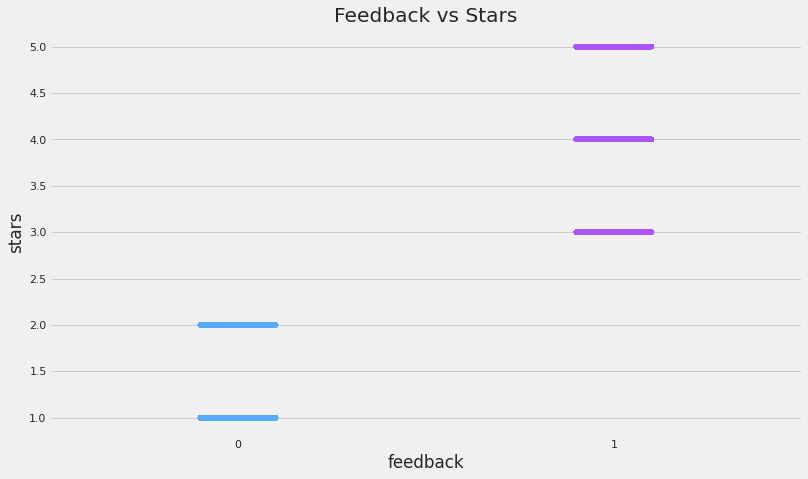

In [ ]:
#plot feedback vs stars:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.stripplot(data['feedback'], data['stars'], palette = 'cool')
plt.title("Feedback vs Stars")
plt.show()

La relación stars contra feedback esta distribuida 40% a 60% por como definimos feedback.

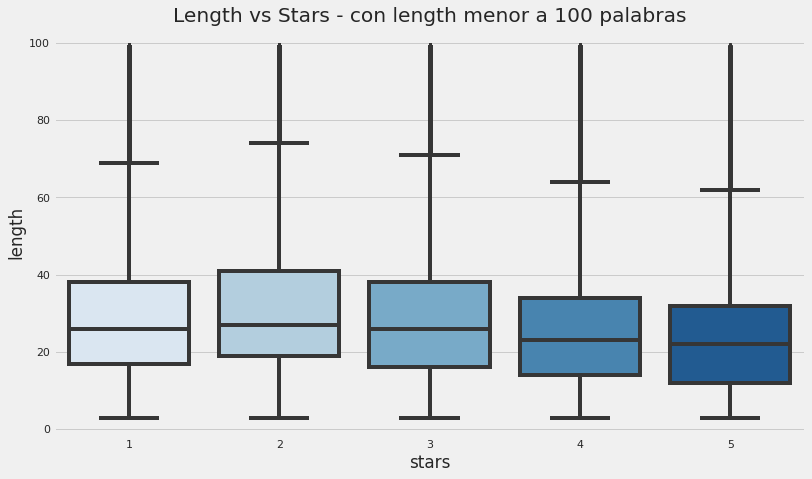

In [ ]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')
sns.boxplot(df['stars'], df['length'], palette = 'Blues')
plt.title("Length vs Stars - con length menor a 100 palabras")
plt.show()

Notamos una tendencia en relación al largo de las reviews, como habiamos supuesto. A mayor cantidad de stars, menor es la longitud de la reseña. 

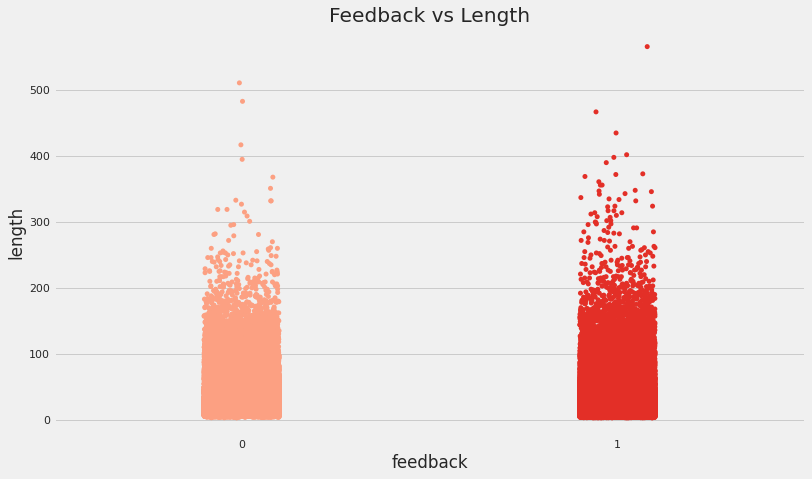

In [ ]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.stripplot(data['feedback'], data['length'], palette = 'Reds')
plt.title("Feedback vs Length")
plt.show()

No observamos una relación entre feedback y length.

Cantidad de palabras en el corpus:

In [ ]:
def count_words(data_text):
    todos = []
    for tit in data_text:
        tit = tit.lower()
        tit = nltk.word_tokenize(tit) # Tokenizar con RegexpTokenizer
        tit = [ s for s in tit if p.match(s) ]
        tit = [word for word in tit if word not in stop_words_sp] # Filtrar por stopwords
        todos.append(tit) #agregar el resultado a la lista
    todos = list(itertools.chain(*todos))    
    freq = nltk.FreqDist(todos)
    df_freq = pd.DataFrame(freq.items(), columns=['Word', 'Frequency'])
    df_freq = df_freq.sort_values('Frequency', ascending=False)
    df_freq.reset_index(drop = True, inplace=True)
    return df_freq

In [ ]:
data_freq = count_words(data['text']) 
print('Cantidad de palabras diferentes en el corpus:', data_freq.shape[0])
print('Cantidad total de palabras en el corpus:', data_freq['Frequency'].sum())

Cantidad de palabras diferentes en el corpus: 68224
Cantidad total de palabras en el corpus: 3326305


#Preprocessing

Luego, del análisis exploratorio de los datos volvemos a cargar los datos y aplicamos el pipeline de preprocesamiento. El mismo cuenta con los siguientes pasos:


*   Concatenamos review_title con review_body
*   Reemplazamos caracteres diacríticos (excepto ñ) por los mismos 'limpios'
*   Pasamos a letra minúscula
*   Reemplazamos emojis por su definición en palabras en español
*   Eliminamos palabras de 1 o 2 letras, a excepción de: no, ni, si, ma
*   Eliminamos palabras que pertencen al set stop_words_sp
*   Eliminamos puntuaciones
*   Aplicamos regular expression: manetenmos únicamente caracteres alfanuméricos

A continuación, obtenemos reviews limpias y estamos en condiciones de aplicar métodologias de stemming y lemmatization. 

*   Reviews preprocessed
*   Stemming
*   Lemmatization

Finalmente aplicamos TF-IDF vectorizer a las tres features obtenidas. Al finalizar este proceso pasamos a aplicar modelos de ML.

In [ ]:
data.text

0         television nevir. nada bueno se me fue ka pant...
1         dinero tirado a la basura con esta compra. hor...
2         solo llega una unidad cuando te obligan a comp...
3         producto no recibido.. no entro en descalifica...
4            devuelto. llega tarde y co la talla equivocada
                                ...                        
199995    tal y como se describe. mando funciona perfect...
199996    funciona perfectamente. compre la bateria con ...
199997    buena calidad.. buena calidad. satisfecha con ...
199998      recomendado. perfecto para el cumple de mi hijo
199999    preciosas. super bien! las brochas son buenas,...
Name: text, Length: 200000, dtype: object

In [ ]:
print(re.sub("[^a-zA-ZÑñ]"," ", '000.....????ÑÑÑ'))

            ÑÑÑ


In [ ]:
def clean(frase):
    frase = no_acentos(frase)
    
    frase = no_emoji(frase)
    
    # Vamos a reemplzar los caracteres que no sean letras por espacios, quitamos puntuación y caracteres repetidos
    frase = str(frase).replace('\\', '').replace('_', ' ')
    
    frase = re.sub("(.)\\1{2,}", "\\1", frase)
        
    frase = re.sub("[^a-zA-ZÑñ]"," ",str(frase))
        
    # Eliminamos las palabras de menos de 3 letras
    frase = nltk.word_tokenize(frase)
    frase_lista = [palabra for palabra in frase if (len(palabra)>2 or palabra in ['no','ni','si','ma'])]
    
    # Sacamos las Stopwords
    frase_lista = [palabra for palabra in frase_lista if not palabra in stop_words_sp ]
    
    # Por ultimo volvemos a unir la lista
    frase = " ".join(frase_lista)
    return frase

In [ ]:
print(clean('MARTIN.;     ¿!!horacio óór¿tóó´oä          hjkvyguÑNPNKTP  tengo tener hay hoy  le de  NÖ sé lo que pasa bueno malo 0.225ñ{{}}}´.//// ..... ......... 🤷'))

martin horacio oor too hjkvyguñnpnktp tener hoy no pasa bueno malo persona encogida hombros


In [ ]:
def preprocess(title, body):
    df = pd.DataFrame()
    #Juntamos title con body
    df['text'] = title + ' '+ body
    #Aplicamos clean
    df['text'] = df['text'].apply(clean)
    return df   

In [ ]:
data['preproc'] = preprocess(data.review_title, data.review_body)
data = data.drop(['product_id', 'reviewer_id', 'review_body', 'review_title', 'product_category', 'text', 'length', 'long_review'], axis= 1)
data.head()

,stars,feedback,preproc
0,1,0,television nevir nada bueno pantalla menos mes...
1,1,0,dinero tirado basura compra horrible comprar n...
2,1,0,solo llega unidad obligan comprar dos obligan ...
3,1,0,producto no recibido no entro descalificar ven...
4,1,0,devuelto llega tarde talla equivocada


###Test & Dev

In [ ]:
data_test1 = pd.read_json('dataset_es_test.json', lines= True)
data_dev = pd.read_json('dataset_es_dev.json', lines= True)
data_test = pd.concat((data_test1, data_dev), ignore_index=True)
data_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [ ]:
data_test.shape

(10000, 8)

In [ ]:
data_test['feedback'] = data_test['stars'].map(lambda x: 0 if (x == 1 or x == 2) else 1)

In [ ]:
data_test['preproc'] = preprocess(data_test.review_title, data_test.review_body)

In [ ]:
data_test.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,feedback,preproc
9995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,1,guadalupe encantado cesta llegado impecable ta...
9996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,1,calidad precio desempeña funcion correctamente
9997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,1,excelente encantado diadema flores tal vienen ...
9998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,1,genial gustan mucho fundas tpu fundas normalme...
9999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,1,buena calidad articulo cumplido expectativas d...


In [ ]:
data_test.stars.value_counts()

5    2000
4    2000
3    2000
2    2000
1    2000
Name: stars, dtype: int64

In [ ]:
data_test = data_test.drop(['review_id','language', 'product_id', 'reviewer_id', 'review_body', 'review_title', 'product_category'], axis= 1)

In [ ]:
data_test.head()

,stars,feedback,preproc
0,1,0,no llego no llego articulo mando correos norma...
1,1,0,amazon sigue cumplir entregas mensajeria horri...
2,1,0,estafa envio decepcionado vendedor pedido no l...
3,1,0,estafa amazon valoracion no producto sino amaz...
4,1,0,no consegui pasar portada kindle pues interes ...


## Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("spanish")

In [ ]:
def stemm(frase):
    frase = nltk.word_tokenize(frase)

    
    frase_lista = [stemmer.stem(palabra) for palabra in frase]
    # Por ultimo volvemos a unir el titular
    return " ".join(frase_lista)

In [ ]:
data['stemm'] = data['preproc'].apply(stemm)

In [ ]:
data.head()

,stars,feedback,preproc,stemm
0,1,0,television nevir nada bueno pantalla menos mes...,television nev nad buen pantall men mes no rec...
1,1,0,dinero tirado basura compra horrible comprar n...,diner tir basur compr horribl compr ni sab ing...
2,1,0,solo llega unidad obligan comprar dos obligan ...,sol lleg unid oblig compr dos oblig compr dos ...
3,1,0,producto no recibido no entro descalificar ven...,product no recib no entro descalific vendedor ...
4,1,0,devuelto llega tarde talla equivocada,devuelt lleg tard tall equivoc


In [ ]:
data_test['stemm'] = data_test['preproc'].apply(stemm)

In [ ]:
data_test.head()

,stars,feedback,preproc,stemm
0,1,0,no llego no llego articulo mando correos norma...,no lleg no lleg articul mand corre normal segu...
1,1,0,amazon sigue cumplir entregas mensajeria horri...,amazon sig cumpl entreg mensajeri horribl no c...
2,1,0,estafa envio decepcionado vendedor pedido no l...,estaf envi decepcion vendedor ped no lleg tiem...
3,1,0,estafa amazon valoracion no producto sino amaz...,estaf amazon valoracion no product sin amazon ...
4,1,0,no consegui pasar portada kindle pues interes ...,no consegui pas port kindl pues inter libr pro...


## Lemmatization

Debido a que el proceso de lemmatization demora bastante tiempo de maquina, dejamos comentado el código con el cual hicimos la lemmatizacion y directamente cargamos el archivo lemma_all.csv con los titulares (title + body) preprocesados y lemmatizados. Realizamos el trabajo asignando un entorno GPU al notebook en Colab y separando en batchs para lemmatizar. Cargamos los archivos lemmatizados por batch para mostrar el trabajo en un directorio especifico.

In [ ]:
#!python -m spacy download es_core_news_sm
#Ya lo hicimos al comienzo!

In [ ]:
import spacy

In [ ]:
nlp_spacy = spacy.load('es_core_news_sm')
spacy.blank('es')

Ejemplo de frase con lemmatizador de spaCy:

In [ ]:
#text1 = "Teo está muy dormido, recien se acaba de despertar de la sisesta y está mirando lo que escribo. Teo te amo."
#print(text1)

#text1 = re.sub("[^a-zA-Z]"," ",str(text1))
# Pasamos todo a minúsculas
#text1 = text1.lower()
  
# Aplicamos spacy Lemmatizer 
#for token in nlp_spacy(text1):
#    print(token.text, token.lemma_, token.pos_)
 
#text1_lemma = [token.lemma_ for token in nlp_spacy(text1)]
        
# Eliminamos las palabras de menos de 3 letras
#text1_lemma = [palabra for palabra in text1_lemma if (len(palabra)>2 or palabra in ['no', 'ni', 'si', 'sí', 'ma'])]
    # Sacamos las Stopwords
#text1_lemma = [palabra for palabra in text1_lemma if not palabra in stop_words_sp]
    
    # Por ultimo volvemos a unir el titular
#text1=" ".join(text1_lemma)

#print(text1)


In [ ]:
###Separamos en intervalos para aplicar el lemmatizador de spacy
###Descargamos cada parte a un .csv que luego concatenamos 
#L = []
#for i, titular in enumerate(data.text):
#    if 180000<= i < 200000:
#        text1_lemma = [token.lemma_ for token in nlp_spacy(titular)]
#        text1_lemma = [palabra for palabra in text1_lemma if (len(palabra)>2 or palabra in ['no', 'ni', 'si', 'ma'])]
#        text1_lemma = [palabra for palabra in text1_lemma if not palabra in stop_words_sp]
#        text1=" ".join(text1_lemma)
#        L.append(text1)
#print(L)

In [ ]:
""" dictionary of lists  
dict = {'text_lemma': L}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('lemma_180000_200000.csv') """

" dictionary of lists  \ndict = {'text_lemma': L}  \n       \ndf = pd.DataFrame(dict) \n    \n# saving the dataframe \ndf.to_csv('lemma_180000_200000.csv') "

In [ ]:
# Juntamos todos los archivos csv de lemma en uno solo
#from glob import glob

In [ ]:
#lemma_files = sorted(glob('lemma_*.csv'))
#lemma_files

In [ ]:
#df_lemma = pd.concat((pd.read_csv(file).assign(filename = file[-5])
#                      for file in lemma_files), ignore_index = True)

In [ ]:
#df_lemma.to_csv('lemma_all.csv')

In [ ]:
data_lemma = pd.read_csv('lemma_all.csv')
data_lemma

,Unnamed: 0,Unnamed: 0.1,text_lemma,filename
0,0,0,television nevir nadar bueno ser pantalla meno...,1
1,1,1,dinero tirar basura comprar horrible no tener ...,1
2,2,2,solo llegar unidad obligar comprar obligar com...,1
3,3,3,producto no recibir no entrar descalificar ven...,1
4,4,4,devolver llegar tardar tallar equivocar,1
...,...,...,...,...
199995,199995,19995,tal comer describir mandar funcionar perfectam...,9
199996,199996,19996,funcionar perfectamente comprar bateria cierto...,9
199997,199997,19997,bueno calidad bueno calidad satisfacer comprar,9
199998,199998,19998,recomendar perfecto parir cumplir hijo,9


In [ ]:
data['lemma'] = data_lemma.text_lemma

**Lemmatization en test**

In [ ]:
L = []
for titular in data_test.preproc:
    text1_lemma = [token.lemma_ for token in nlp_spacy(titular)]
    text1_lemma = [palabra for palabra in text1_lemma if (len(palabra)>2 or palabra in ['no', 'ni', 'si', 'ma'])]
    text1_lemma = [palabra for palabra in text1_lemma if not palabra in stop_words_sp]
    text1=" ".join(text1_lemma)
    L.append(text1)
data_test['lemma'] = L   

Reordenamos las columnas y visualizamos el resultado en data y en data_test:

In [ ]:
cols = ['preproc', 'stemm', 'lemma', 'stars', 'feedback']
data = data[cols]
data_test = data_test[cols]

In [ ]:
data.sample(5)

,preproc,stemm,lemma,stars,feedback
15700,carcasa protectora no recomiendo xiaomi no ada...,carcas protector no recom xiaomi no adapt bien...,carcasa protector no recomer parir xiaomi no a...,1,0
43505,funciona quiere pues veces quiere lee cosas mu...,funcion quier pues vec quier lee cos much deci...,funcionar querer pues vez querer leer coser mu...,2,0
176858,bueno buen producto rapido,buen buen product rap,bueno bueno producto rapido,5,1
25554,no memory foam proveedor anuncia plantillas me...,no memory foam proveedor anunci plantill memor...,no ser memory foam proveedor anunciar plantill...,1,0
1292,fatal experiencia no no mandado regalo navidad...,fatal experient no no mand regal navid no sol ...,fatal experiencia no no haber mandar ser regal...,1,0


In [ ]:
data_test.sample(5)

,preproc,stemm,lemma,stars,feedback
8052,lampara uñas lampara led uñas calidad bastante...,lamp uñas lamp led uñas calid bastant buen recom,lampara uña lampara led uña calidad bastante b...,4,1
5769,tamano pequeno tamano demasiado pequena color ...,taman pequen taman demasi pequen color ni pare...,tamano pequeno tamano demasiar pequena color n...,1,0
9686,espectacular foco perfecto gusta intensidad lu...,espectacul foc perfect gust intens luz buen op...,espectacular foco perfecto gustar intensidad l...,5,1
6671,esperaba mejor devuelto producto venia defectu...,esper mejor devuelt product veni defectu preci...,esperar mejor devolver producto venia defectuo...,2,0
521,no fiable rompio minutos,no fiabl rompi minut,no fiable rompio minuto,1,0


Descargamos nuestros datos preprocesados para poder trabajar desde este inicio de aqui en adelante.

In [ ]:
data.to_csv('data.csv')
data_test.to_csv('data_test.csv')

## TFIDF Vectorizer

Dado que tenemos guardados los csv de data y data_test con los tres preprocesamientos, volvemos a cargar los datos desde aqui para la sección de modelado de los algoritmos de ML. Notamos que hemos juntado los json test y dev en un úncio conjunto de test de 10000 instancias.

In [2]:
data_test = pd.read_csv('data_test.csv', usecols=['preproc', 'stemm', 'lemma', 'stars', 'feedback'])
data_test.shape

(10000, 5)

In [3]:
data_test.columns

Index(['preproc', 'stemm', 'lemma', 'stars', 'feedback'], dtype='object')

In [4]:
data_test.head()

,preproc,stemm,lemma,stars,feedback
0,no llego no llego articulo mando correos norma...,no lleg no lleg articul mand corre normal segu...,no llegar no llegar articular mandar correo no...,1,0
1,amazon sigue cumplir entregas mensajeria horri...,amazon sig cumpl entreg mensajeri horribl no c...,amazon seguir cumplir entregar mensajeria horr...,1,0
2,estafa envio decepcionado vendedor pedido no l...,estaf envi decepcion vendedor ped no lleg tiem...,estafar envio decepcionar vendedor pedir no ll...,1,0
3,estafa amazon valoracion no producto sino amaz...,estaf amazon valoracion no product sin amazon ...,estafar amazon valoracion no producto sino ama...,1,0
4,no consegui pasar portada kindle pues interes ...,no consegui pas port kindl pues inter libr pro...,no consegui pasar portar kindle pues interes l...,1,0


In [5]:
data = pd.read_csv('data.csv', usecols=['preproc', 'stemm', 'lemma', 'stars', 'feedback'])
data.shape

(200000, 5)

In [6]:
data.head()

,preproc,stemm,lemma,stars,feedback
0,television nevir nada bueno pantalla menos mes...,television nev nad buen pantall men mes no rec...,television nevir nadar bueno ser pantalla meno...,1,0
1,dinero tirado basura compra horrible comprar n...,diner tir basur compr horribl compr ni sab ing...,dinero tirar basura comprar horrible no tener ...,1,0
2,solo llega unidad obligan comprar dos obligan ...,sol lleg unid oblig compr dos oblig compr dos ...,solo llegar unidad obligar comprar obligar com...,1,0
3,producto no recibido no entro descalificar ven...,product no recib no entro descalific vendedor ...,producto no recibir no entrar descalificar ven...,1,0
4,devuelto llega tarde talla equivocada,devuelt lleg tard tall equivoc,devolver llegar tardar tallar equivocar,1,0


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

El uso de vectores TF-IDF, que se han calculado con todo el corpus (subconjuntos de train y test combinados), en el entrenamiento del modelo puede introducir alguna **fuga de datos** y, por lo tanto, producir métrcias de rendimiento demasiado optimistas. Esto se debe a que la parte IDF de las características TF-IDF del conjunto de entrenamiento ya incluirá información del conjunto de test.

Calcularlos completamente por separado para el conjunto de train y test tampoco es una buena idea, porque además de probar la calidad de su modelo, también estará probando la calidad de su estimación de IDF. Debido a que el conjunto de pruebas suele ser pequeño, esto será una estimación deficiente y empeorará las métricas de rendimiento.

Por lo tanto, (de manera análoga a la imputación media común de los valores perdidos) realizamos la normalización TF-IDF en el conjunto de train por separado y luego usamos el vector IDF del conjunto de train para calcular los vectores TF-IDF del conjunto de test.

Creamos un objeto TF-IDF para cada preprocesamiento, fitteamos con train y transformamos train y test en cada uno:

In [8]:
tfidf_pre = TfidfVectorizer(max_features = 1000, ngram_range=(1,2))
tfidf_stemm = TfidfVectorizer(max_features = 1000, ngram_range=(1,2))
tfidf_lemma = TfidfVectorizer(max_features = 1000, ngram_range=(1,2))

In [9]:
tfidf_pre = tfidf_pre.fit(data.preproc)
X_pre_train = tfidf_pre.transform(data.preproc).toarray()
X_pre_test = tfidf_pre.transform(data_test.preproc).toarray()

In [10]:
tfidf_stemm   = tfidf_stemm.fit(data.stemm)
X_stemm_train = tfidf_stemm.transform(data.stemm).toarray()
X_stemm_test  = tfidf_stemm.transform(data_test.stemm).toarray()

In [11]:
tfidf_lemma   = tfidf_lemma.fit(data.lemma)
X_lemma_train = tfidf_lemma.transform(data.lemma).toarray()
X_lemma_test  = tfidf_lemma.transform(data_test.lemma).toarray()

In [12]:
y_star_train = data.stars
y_star_test  = data_test.stars
y_feed_train = data.feedback
y_feed_test  = data_test.feedback

In [13]:
print('X Preprocess shape: train', X_pre_train.shape, ' / test', X_pre_test.shape)
print('X Stemming shape:  train', X_stemm_train.shape, ' / test', X_stemm_test.shape)
print('X Lemmatized shape:  train', X_lemma_train.shape, ' / test', X_lemma_test.shape)
print('y Stars shape: train', y_star_train.shape, ' / test', y_star_test.shape)
print('y Feedback shape: train', y_feed_train.shape, ' / test', y_feed_test.shape)

X Preprocess shape: train (200000, 1000)  / test (10000, 1000)
X Stemming shape:  train (200000, 1000)  / test (10000, 1000)
X Lemmatized shape:  train (200000, 1000)  / test (10000, 1000)
y Stars shape: train (200000,)  / test (10000,)
y Feedback shape: train (200000,)  / test (10000,)


# Machine Learning models


Planteamos el siguiente escenario con el que trabajaremos los modelos de machine learning:


*   Por un lado tenemos 3 matrices sparse que correponden a los datos *preprocesados, stemmizados y lemmatizados.*
*   Por otro lado tenemos 2 vectores target para aplicar los modelos: *stars y feedback.*
*   Para cada uno de los tipos de preprocesamiento y cada uno de los targets estudiamos modelos *Naive Bayes, SVC y Random Forest.*
*   Obtenemos para cada target 6 modelos (cruzando preprocesamientos y modelos).
*   Seleccionamos el mejor modelo para cada tipo de target y realizamos optimización de hiperparámetros. 

Esperamos poder completar con las métricas obtenidas tablas como la que mostramos vacia a continuación. 



In [15]:
from tabulate import tabulate
print('Target: Stars / Feedback')
print('Tabla errores en test por modelo y por tipo de preprocesamiento:')
print(tabulate([['Preproc', ' ', ' ', ' '],
                ['Stemming', ' ', ' ', ' '],
                ['Lemmatization',  ' ', ' ', ' ']], 
                headers=['Model', 'Naive Bayes', 'Linear SVC', 'Random Forest'], tablefmt='orgtbl'))

Target: Stars / Feedback
Tabla errores en test por modelo y por tipo de preprocesamiento:
| Model         | Naive Bayes   | Linear SVC   | Random Forest   |
|---------------+---------------+--------------+-----------------|
| Preproc       |               |              |                 |
| Stemming      |               |              |                 |
| Lemmatization |               |              |                 |


In [17]:
def confusion(ytest,y_pred):
    names=["1","2","3","4","5"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, linewidth=.5, linecolor="r", fmt=".0f", ax=ax, center= True)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

Creamos una función para evaluar modelos para el target 'stars'.

In [18]:
def evaluar_modelo(model_fit, X_train, X_test, y_train, y_test):
    print(model_fit)
    acc_train = model_fit.score(X_train, y_train)
    print("Accuracy en train: ", acc_train)
    y_pred = model_fit.predict(X_test)
    acc_test = accuracy_score(y_pred, y_test)
    print("Accuracy en test: ", acc_test)

    print(classification_report(y_test, y_pred))
    confusion(y_test, y_pred)
    return  acc_train, acc_test

**Errores**
A continuación hacemos un resumen de las métricas con las que evaluaremos nuestros modelos de clasifiación:


*   Accuracy = Correct Predictions / Total Predictions
*   Precision = TruePositive / (TruePositive + FalsePositive)
*   Recall = TruePositive / (TruePositive + FalseNegative)
*   F-Measure = (2 * Precision * Recall) / (Precision + Recall)


Mostramos como se calculan los anteriores a partir de una matriz de confusión para una clasificación binaria:


```
               | Positive Prediction | Negative Prediction
Positive Class | True Positive (TP)  | False Negative (FN)
Negative Class | False Positive (FP) | True Negative (TN)
```

Aunque se usa ampliamente, accuracy es casi universalmente inapropiada para una clasificación desbalanceada. La razón es que se puede lograr un alto accuracy (o un error bajo) mediante un modelo sin habilidad que solo predice la clase mayoritaria.

Precision resume la fracción de ejemplos asignados a la clase positiva que pertenecen a la clase positiva.

Recall resume qué tan bien se predijo la clase positiva y es el mismo cálculo que la sensibilidad.

La precisión y el recall se pueden combinar en una única puntuación que busca equilibrar ambas métricas, denominada F-score. La métrica F-score es útil para la clasificación desbalanceada.





##Target: stars

### Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

**Preprocess**

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.471185
Accuracy en test:  0.4704
              precision    recall  f1-score   support

           1       0.58      0.72      0.64      2000
           2       0.43      0.33      0.38      2000
           3       0.39      0.26      0.32      2000
           4       0.38      0.24      0.29      2000
           5       0.47      0.80      0.59      2000

    accuracy                           0.47     10000
   macro avg       0.45      0.47      0.44     10000
weighted avg       0.45      0.47      0.44     10000



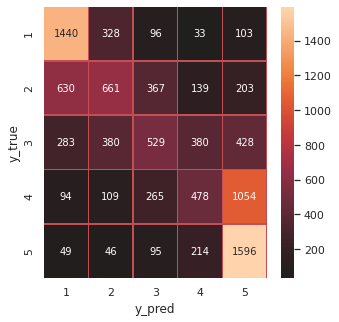

In [20]:
nb_pre = GaussianNB()
nb_pre.fit(X_pre_train, y_star_train)
error_nb_pre_star = evaluar_modelo(nb_pre, X_pre_train, X_pre_test, y_star_train, y_star_test)

**Stemming**

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.47238
Accuracy en test:  0.462
              precision    recall  f1-score   support

           1       0.56      0.72      0.63      2000
           2       0.40      0.34      0.37      2000
           3       0.37      0.24      0.29      2000
           4       0.39      0.24      0.30      2000
           5       0.48      0.77      0.59      2000

    accuracy                           0.46     10000
   macro avg       0.44      0.46      0.44     10000
weighted avg       0.44      0.46      0.44     10000



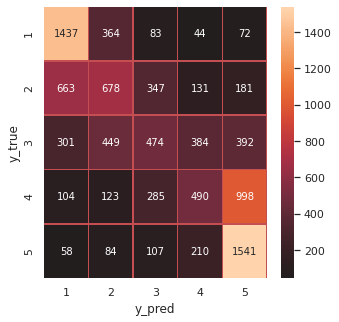

In [21]:
nb_ste = GaussianNB()
nb_ste.fit(X_stemm_train, y_star_train)
error_nb_stemm_star = evaluar_modelo(nb_ste, X_stemm_train, X_stemm_test, y_star_train, y_star_test)

**Lemmatization**

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.48002
Accuracy en test:  0.464
              precision    recall  f1-score   support

           1       0.54      0.75      0.63      2000
           2       0.40      0.33      0.36      2000
           3       0.39      0.23      0.29      2000
           4       0.40      0.23      0.30      2000
           5       0.48      0.77      0.59      2000

    accuracy                           0.46     10000
   macro avg       0.44      0.46      0.43     10000
weighted avg       0.44      0.46      0.43     10000



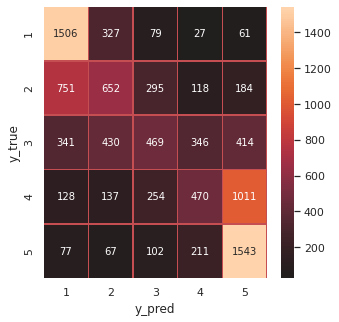

In [22]:
nb_lem = GaussianNB()
nb_lem.fit(X_lemma_train, y_star_train)
error_nb_lemma_star = evaluar_modelo(nb_lem, X_lemma_train, X_lemma_test, y_star_train, y_star_test)

### Linear SVC

**Preprocess**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.5403
Accuracy en test:  0.5329
              precision    recall  f1-score   support

           1       0.63      0.74      0.68      2000
           2       0.45      0.42      0.44      2000
           3       0.47      0.37      0.41      2000
           4       0.48      0.41      0.44      2000
           5       0.58      0.72      0.65      2000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000



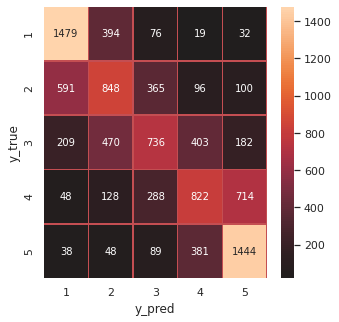

In [23]:
clf = LinearSVC(C = 20, max_iter= 500)
clf.fit(X_pre_train, y_star_train)
error_svc_pre_star = evaluar_modelo(clf, X_pre_train, X_pre_test, y_star_train, y_star_test)

**Stemming**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.542745
Accuracy en test:  0.5295
              precision    recall  f1-score   support

           1       0.62      0.74      0.67      2000
           2       0.45      0.44      0.44      2000
           3       0.45      0.34      0.39      2000
           4       0.48      0.41      0.44      2000
           5       0.59      0.72      0.65      2000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000



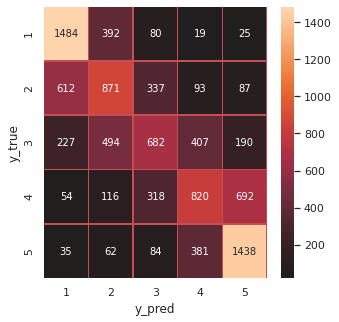

In [24]:
clf_stemm = LinearSVC(C = 20, max_iter= 500)
clf_stemm.fit(X_stemm_train, y_star_train)
error_svc_stemm_star = evaluar_modelo(clf_stemm, X_stemm_train, X_stemm_test, y_star_train, y_star_test)

**Lemmatization**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.5432
Accuracy en test:  0.5222
              precision    recall  f1-score   support

           1       0.59      0.78      0.67      2000
           2       0.44      0.40      0.42      2000
           3       0.48      0.30      0.37      2000
           4       0.46      0.41      0.43      2000
           5       0.57      0.72      0.63      2000

    accuracy                           0.52     10000
   macro avg       0.51      0.52      0.51     10000
weighted avg       0.51      0.52      0.51     10000



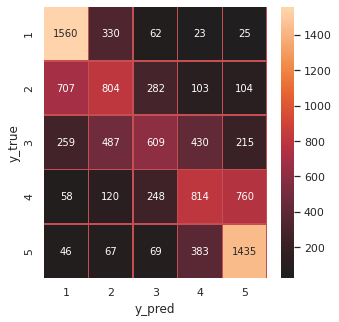

In [25]:
clf_lemma = LinearSVC(C = 20, max_iter= 500)
clf_lemma.fit(X_lemma_train, y_star_train)
error_svc_lemma_star = evaluar_modelo(clf_lemma, X_lemma_train, X_lemma_test, y_star_train, y_star_test)

### Random Forest

**Preprocess**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.98843
Accuracy en test:  0.5052
              precision    recall  f1-score   support

           1       0.62      0.72      0.67      2000
           2       0.44      0.42      0.43      2000
           3       0.41      0.36      0.38      2000
           4       0.44      0.40      0.42      2000
           5       0.57      0.63      0.60      2000

    accuracy                           0.51     10000
   macro avg       

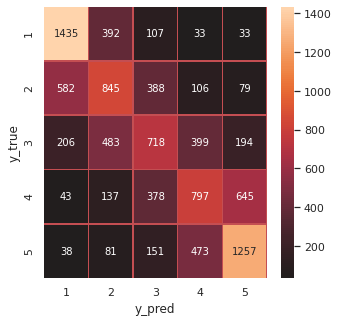

In [26]:
rf = RandomForestClassifier()
rf.fit(X_pre_train, y_star_train)
error_rf_pre_star = evaluar_modelo(rf, X_pre_train, X_pre_test, y_star_train, y_star_test)

Notamos que el modelo está overfitteando, pero el desempeño en test es similar a los resultados en test para Naive Bayes y para SVC. Regularizamos para evitar el overfitting limitando la profundidad de los árboles.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.49706
Accuracy en test:  0.471
              precision    recall  f1-score   support

           1       0.58      0.70      0.63      2000
           2       0.38      0.33      0.36      2000
           3       0.42      0.29      0.34      2000
           4       0.44      0.34      0.38      2000
           5       0.47      0.70      0.56      2000

    accuracy                           0.47     10000
   macro avg       0.4

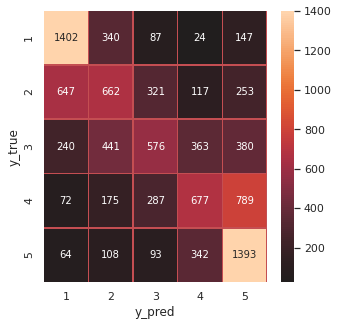

In [28]:
rf_better = RandomForestClassifier(max_depth= 14)
rf_better.fit(X_pre_train, y_star_train)
error_rf_better_pre_star = evaluar_modelo(rf_better, X_pre_train, X_pre_test, y_star_train, y_star_test)

Vemos que mejoro el rendimiento del modelo tanto en términos de overfitting como asi también el tiempo de maquina. Los valores de las métricas son similares a los obtenidos en los modelos anteriores. A partir de este momento, trabajamos con max_depth = 14.

**Stemming**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.51331
Accuracy en test:  0.4779
              precision    recall  f1-score   support

           1       0.58      0.74      0.65      2000
           2       0.41      0.32      0.36      2000
           3       0.41      0.27      0.33      2000
           4       0.44      0.35      0.39      2000
           5       0.48      0.71      0.57      2000

    accuracy                           0.48     10000
   macro avg       0.

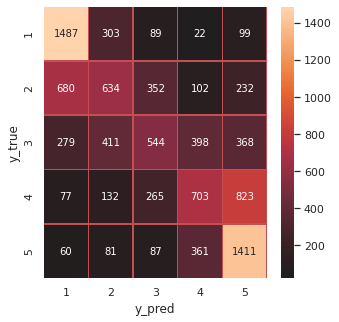

In [29]:
rf_stemm = RandomForestClassifier(max_depth = 14)
rf_stemm.fit(X_stemm_train, y_star_train)
error_rf_stemm_star = evaluar_modelo(rf_stemm, X_stemm_train, X_stemm_test, y_star_train, y_star_test)

**Lemmatization**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.51026
Accuracy en test:  0.4595
              precision    recall  f1-score   support

           1       0.54      0.74      0.62      2000
           2       0.38      0.29      0.33      2000
           3       0.43      0.21      0.28      2000
           4       0.43      0.33      0.37      2000
           5       0.45      0.73      0.56      2000

    accuracy                           0.46     10000
   macro avg       0.

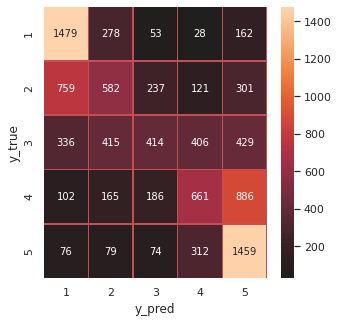

In [30]:
rf_lemma = RandomForestClassifier(max_depth= 14)
rf_lemma.fit(X_lemma_train, y_star_train)
error_rf_lemma_star = evaluar_modelo(rf_lemma, X_lemma_train, X_lemma_test, y_star_train, y_star_test)

### Análisis

In [31]:
from tabulate import tabulate
print('Target: Stars')
print('Tabla errores en test por modelo y por tipo de preprocesamiento:')
print(tabulate([['Preproc', error_nb_pre_star[1], error_svc_pre_star[1], error_rf_pre_star[1]],
                ['Stemming', error_nb_stemm_star[1], error_svc_stemm_star[1], error_rf_stemm_star[1]],
                ['Lemmatization', error_nb_lemma_star[1], error_svc_lemma_star[1], error_rf_lemma_star[1]]], 
                headers=['Model', 'Naive Bayes', 'Linear SVC', 'Random Forest'], tablefmt='orgtbl'))

Target: Stars
Tabla errores en test por modelo y por tipo de preprocesamiento:
| Model         |   Naive Bayes |   Linear SVC |   Random Forest |
|---------------+---------------+--------------+-----------------|
| Preproc       |        0.4704 |       0.5329 |          0.5052 |
| Stemming      |        0.462  |       0.5295 |          0.4779 |
| Lemmatization |        0.464  |       0.5222 |          0.4595 |


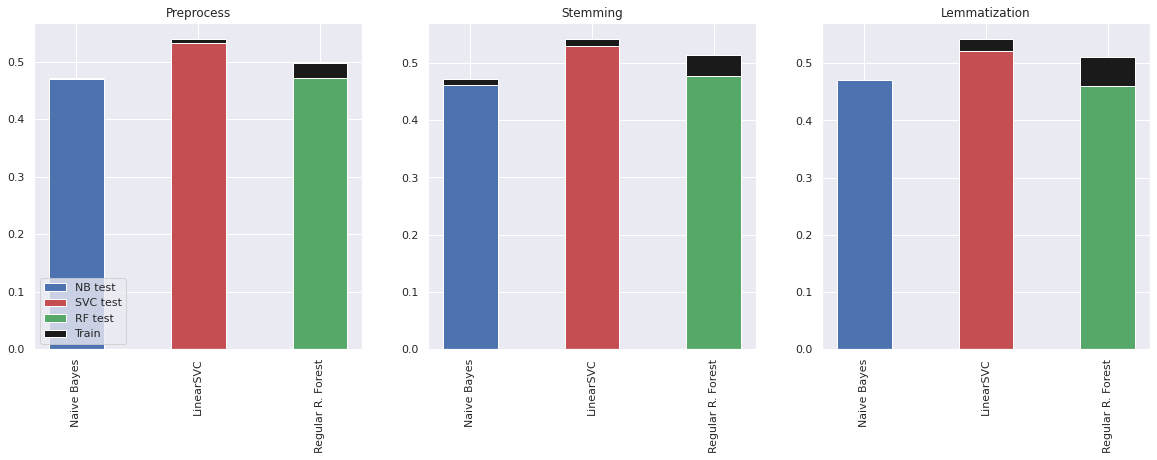

In [47]:
process_test = [error_nb_pre_star[1], error_svc_pre_star[1], error_rf_better_pre_star[1]]
stemm_test = [error_nb_stemm_star[1], error_svc_stemm_star[1], error_rf_stemm_star[1]]
lemma_test = [error_nb_pre_star[1], error_svc_lemma_star[1], error_rf_lemma_star[1]]

process_train = [error_nb_pre_star[0] - process_test[0], error_svc_pre_star[0]  - process_test[1], error_rf_better_pre_star[0]  - process_test[2]] 
stemm_train = [error_nb_stemm_star[0] - stemm_test[0], error_svc_stemm_star[0] - stemm_test[1], error_rf_stemm_star[0]- stemm_test[2]]
lemma_train = [error_nb_pre_star[0] - lemma_test[0], error_svc_lemma_star[0] - lemma_test[1], error_rf_lemma_star[0] - lemma_test[2]]

ticks_x =('Naive Bayes', 'LinearSVC', 'Regular R. Forest')
color = ('b','r','g')
width = 0.45
x=np.arange(3)   
### GRAFICAMOS LOS RESULTADOS
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
p =plt.bar(x,process_test,color=color,width=width)
p2 = plt.bar(x,process_train,width=width,bottom=process_test,color='k')
plt.legend((p[0],p[1],p[2],p2[0]), ('NB test','SVC test', 'RF test', 'Train'))
plt.title('Preprocess')
plt.xticks(x,ticks_x, rotation='vertical')
plt.subplot(1,3,2)
plt.bar(x,stemm_test,color=color,width=width)
plt.bar(x,stemm_train,width=width,bottom=stemm_test,color='k')
plt.title('Stemming')
plt.xticks(x,ticks_x, rotation='vertical')
plt.subplot(1,3,3)
plt.bar(x,lemma_test,width=width,color=color)
plt.bar(x,lemma_train,width=width,bottom=lemma_test,color='k')
plt.title('Lemmatization')
plt.xticks(x,ticks_x, rotation='vertical')

plt.show()

Vemos que las mejores performances las obtenemos cuando aplicamos Linear SVC. Las métricas para Random Forest son similares a las de Linear SVC pero en Linear SVC los modelos no overfitteaban. Vimos que restingiendo la profundidad de los árboles en RandomForest logramos regularizar el modelo. Sin embargo, no logramos una mejora en el desempeño en test. Por estas razones, realizamos a continuación optimización de hiperparámetros para el modelo Linear SVC con features stemmizados.

Por último notamos que en los 9 modelos (3 preprocesamientos x 3 algoritmos) estudiados hasta ahora para las clases de stars 1 y 5 las performances en precision y recall son mayores (rondando 0.60 y a veces llegando hasta 0.75), mientras que en las clases de stars intermedias 2, 3 o 4 las performances en precision y recall son menores (rondando 0.30 y a veces llegando hasta 0.20). El peor desempeño lo encontramos en la etiqueta de 3 stars. Tomamos este hecho como indicio de que es necesario estudiar el comportamiento de los modelos con variable feedback como target.

### Hyperparameter optimization

Optimización de hiperparámetros para el modelo Linear SVC con features stemmizados y target stars:

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
import warnings
warnings.filterwarnings('ignore')
#fijamos seed = 0
svc_o = LinearSVC(dual = False,
                  random_state= 0)

#Parámetros para  RandomizedSearchCV
params = {  'penalty': ['l1', 'l2'],              #norma de regularizacion
             'loss' : ['hinge', 'squared_hinge'], #tipo función de pérdida
             'tol': [1e-3, 1e-4, 1e-5],           #tolerancia para el error
             'C': [10, 20, 50],                   #parámetro clave del modelo SVC
             'max_iter': [500, 1000]              #número máximo de iteraciones 
         }
                 
svc_rs = RandomizedSearchCV( estimator = svc_o, 
                             param_distributions = params, 
                             n_iter = 15, 
                             cv = 5,               #crossvalidation de 5-folds
                             scoring = 'accuracy'
                            )


svc_rs.fit(X_stemm_train, y_star_train)

print('Los mejores parámetros son:', svc_rs.best_params_, '\n')
print('El mejor score es:', svc_rs.best_score_)

Los mejores parámetros son: {'tol': 0.0001, 'penalty': 'l1', 'max_iter': 1000, 'loss': 'squared_hinge', 'C': 10} 

El mejor score es: 0.53074


Obtenemos del RandomizedSearch con CrossValidation anterior los siguientes resultados (copiamos a continuación para no perder los resultados):



```
Los mejores parámetros son: {'tol': 0.0001, 'penalty': 'l1', 'max_iter': 1000, 'loss': 'squared_hinge', 'C': 10} 

El mejor score es: 0.53074
```



In [35]:
#guardamos el mejor modelo y volvemos a fittear
svc_o = LinearSVC(dual = False,
                  random_state = 0,
                  tol= 0.0001,
                  penalty ='l1', 
                  max_iter = 1000,
                  loss = 'squared_hinge',
                  C =  10
                  )

svc_o.fit(X_stemm_train, y_star_train)

LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
          verbose=0)

LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
          verbose=0)
Accuracy en train:  0.54285
Accuracy en test:  0.5292
              precision    recall  f1-score   support

           1       0.62      0.74      0.67      2000
           2       0.45      0.43      0.44      2000
           3       0.45      0.34      0.39      2000
           4       0.48      0.41      0.44      2000
           5       0.59      0.72      0.65      2000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000



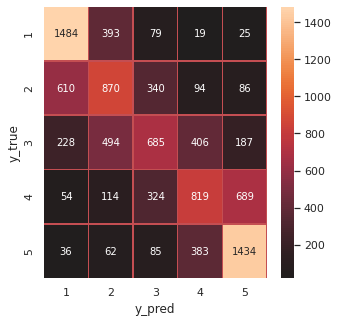

In [36]:
error_svc_opt = evaluar_modelo(svc_o, X_stemm_train, X_stemm_test, y_star_train, y_star_test)

No encontramos mejora notable entre el modelo LinearSVC y su versión optimizada para el texto con metodo stemming.

## Target: feedback

In [48]:
def confusion_feed(ytest,y_pred):
    names=["0","1"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, linewidth=.5, linecolor="r", fmt=".0f", ax=ax, center= True)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

def evaluar_feedback(model_fit, X_train, X_test, y_train, y_test):
    print(model_fit)
    acc_train = model_fit.score(X_train, y_train)
    print("Accuracy en train: ", acc_train)
    y_pred = model_fit.predict(X_test)
    acc_test = accuracy_score(y_pred, y_test)
    print("Accuracy en test: ", acc_test)

    print(classification_report(y_test, y_pred))
    confusion_feed(y_test, y_pred)
    return  acc_train, acc_test    

### Naive Bayes

**Preprocess**

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.804565
Accuracy en test:  0.802
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      4000
           1       0.86      0.81      0.83      6000

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



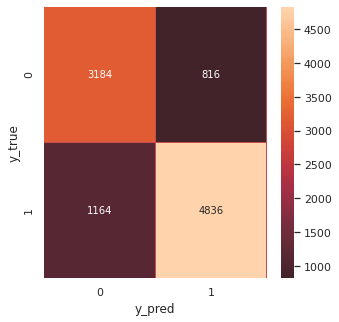

In [49]:
nb_pre_feed = GaussianNB()
nb_pre_feed.fit(X_pre_train, y_feed_train)
error_nb_pre_feed = evaluar_feedback(nb_pre_feed, X_pre_train, X_pre_test, y_feed_train, y_feed_test)

**Stemming**

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.80054
Accuracy en test:  0.7976
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      4000
           1       0.86      0.79      0.82      6000

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.80      0.80      0.80     10000



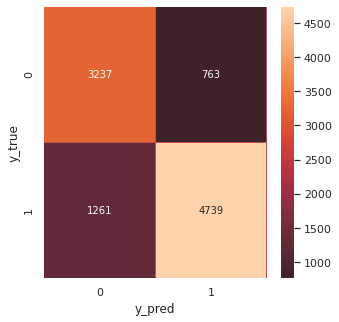

In [50]:
nb_stemm_feed = GaussianNB()
nb_stemm_feed.fit(X_stemm_train, y_feed_train)
error_nb_stemm_feed = evaluar_feedback(nb_stemm_feed, X_stemm_train, X_stemm_test, y_feed_train, y_feed_test)

**Lemmatization**

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.80426
Accuracy en test:  0.7952
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      4000
           1       0.87      0.77      0.82      6000

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.81      0.80      0.80     10000



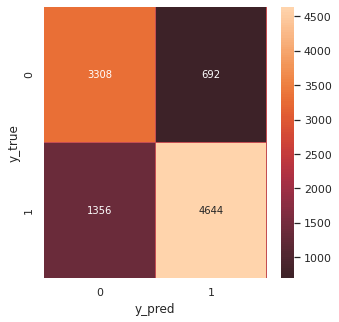

In [51]:
nb_lemma_feed = GaussianNB()
nb_lemma_feed.fit(X_lemma_train, y_feed_train)
error_nb_lemma_feed = evaluar_feedback(nb_lemma_feed, X_lemma_train, X_lemma_test, y_feed_train, y_feed_test)

### Linear SVC

**Preprocess**

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.847555
Accuracy en test:  0.8422
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4000
           1       0.86      0.88      0.87      6000

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000



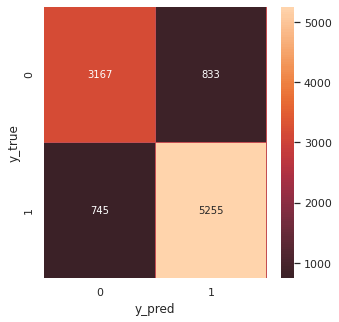

In [52]:
clf_pre_feed = LinearSVC(C = 20, max_iter= 500)
clf_pre_feed.fit(X_pre_train, y_feed_train)
error_svc_pre_feed = evaluar_feedback(clf_pre_feed, X_pre_train, X_pre_test, y_feed_train, y_feed_test)

**Stemming**

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.849415
Accuracy en test:  0.8474
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4000
           1       0.87      0.88      0.87      6000

    accuracy                           0.85     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000



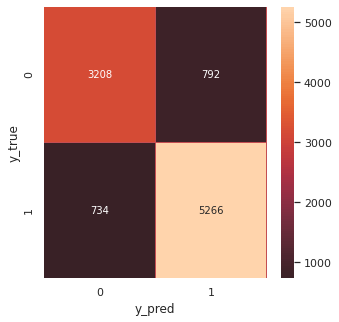

In [53]:
clf_stemm_feed = LinearSVC(C = 20, max_iter= 500)
clf_stemm_feed.fit(X_stemm_train, y_feed_train)
error_svc_stemm_feed = evaluar_feedback(clf_stemm_feed, X_stemm_train, X_stemm_test, y_feed_train, y_feed_test)

**Lemmatization**

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.847605
Accuracy en test:  0.8439
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4000
           1       0.87      0.86      0.87      6000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



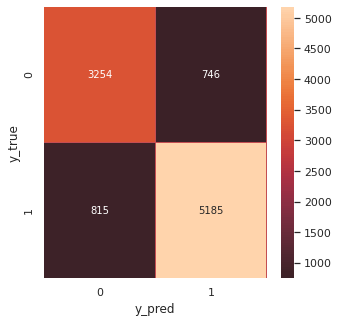

In [54]:
clf_lemma_feed = LinearSVC(C = 20, max_iter= 500)
clf_lemma_feed.fit(X_lemma_train, y_feed_train)
error_svc_lemma_feed = evaluar_feedback(clf_lemma_feed, X_lemma_train, X_lemma_test, y_feed_train, y_feed_test)

### Random Forest

**Preprocess**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.73492
Accuracy en test:  0.7338
              precision    recall  f1-score   support

           0       0.89      0.38      0.53      4000
           1       0.70      0.97      0.81      6000

    accuracy                           0.73     10000
   macro avg       0.80      0.68      0.67     10000
weighted avg       0.78      0.73      0.70     10000



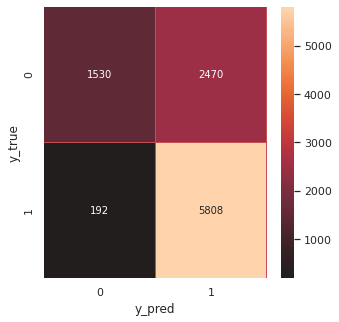

In [59]:
rf_pre_feed = RandomForestClassifier(max_depth= 8)
rf_pre_feed.fit(X_pre_train, y_feed_train)
error_rf_pre_feed = evaluar_feedback(rf_pre_feed, X_pre_train, X_pre_test, y_feed_train, y_feed_test)

**Stemming**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.600185
Accuracy en test:  0.6002
              precision    recall  f1-score   support

           0       0.54      0.00      0.01      4000
           1       0.60      1.00      0.75      6000

    accuracy                           0.60     10000
   macro avg       0.57      0.50      0.38     10000
weighted avg       0.58      0.60      0.45     10000



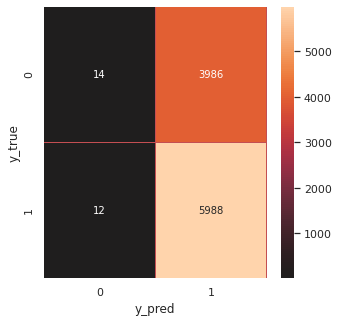

In [60]:
rf_stemm_feed = RandomForestClassifier(max_depth = 8)
rf_stemm_feed.fit(X_pre_train, y_feed_train)
error_rf_stemm_feed = evaluar_feedback(rf_stemm_feed, X_stemm_train, X_stemm_test, y_feed_train, y_feed_test)

**Lemmatization**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.741065
Accuracy en test:  0.723
              precision    recall  f1-score   support

           0       0.91      0.34      0.50      4000
           1       0.69      0.98      0.81      6000

    accuracy                           0.72     10000
   macro avg       0.80      0.66      0.65     10000
weighted avg       0.78      0.72      0.68     10000



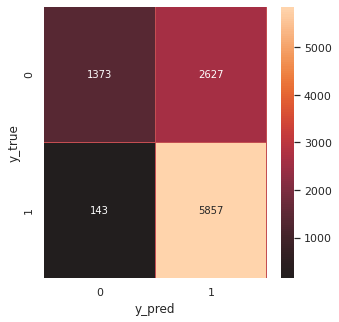

In [58]:
rf_lemma_feed = RandomForestClassifier(max_depth=8)
rf_lemma_feed.fit(X_lemma_train, y_feed_train)
error_rf_lemma_feed = evaluar_feedback(rf_lemma_feed, X_lemma_train, X_lemma_test, y_feed_train, y_feed_test)

Vemos que el modelo Random Forest con features Stemming y Lemmatized predice la mayor cantidad de veces etiquetas positivas, dando como resultados grandes desbalanceos para recall y F1-score.

### Análsis

In [61]:
print('Target: Feedback')
print('Tabla errores en test por modelo y por tipo de preprocesamiento:')
print(tabulate([['Preproc', error_nb_pre_feed[1], error_svc_pre_feed[1], error_rf_pre_feed[1]],
                ['Stemming', error_nb_stemm_feed[1], error_svc_stemm_feed[1], error_rf_stemm_feed[1]],
                ['Lemmatization', error_nb_lemma_feed[1], error_svc_lemma_feed[1], error_rf_lemma_feed[1]]], 
                headers=['Model', 'Naive Bayes', 'Linear SVC', 'Random Forest'], tablefmt='orgtbl'))

Target: Feedback
Tabla errores en test por modelo y por tipo de preprocesamiento:
| Model         |   Naive Bayes |   Linear SVC |   Random Forest |
|---------------+---------------+--------------+-----------------|
| Preproc       |        0.802  |       0.8422 |          0.7338 |
| Stemming      |        0.7976 |       0.8474 |          0.6002 |
| Lemmatization |        0.7952 |       0.8439 |          0.723  |


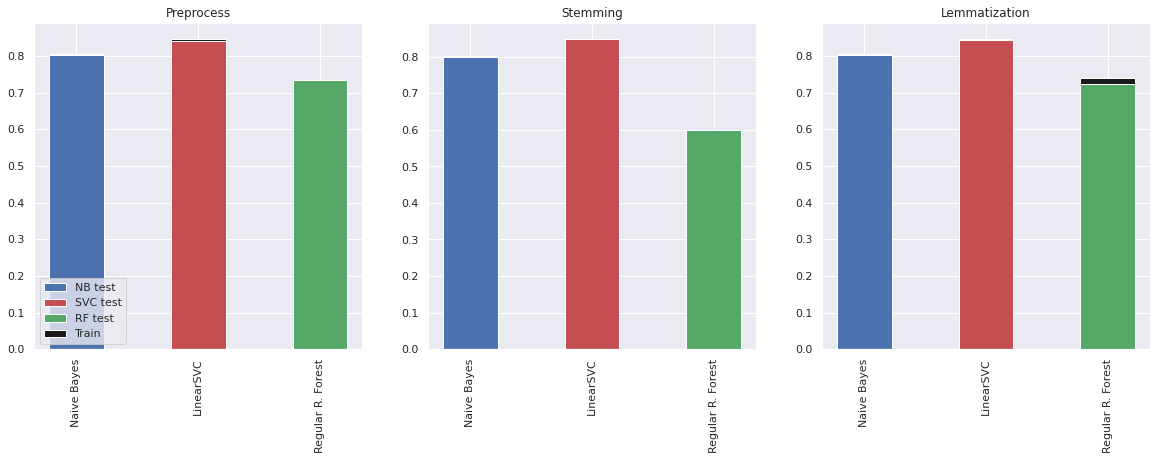

In [63]:
process_test = [error_nb_pre_feed[1], error_svc_pre_feed[1], error_rf_pre_feed[1]]
stemm_test = [error_nb_stemm_feed[1], error_svc_stemm_feed[1], error_rf_stemm_feed[1]]
lemma_test = [error_nb_pre_feed[1], error_svc_lemma_feed[1], error_rf_lemma_feed[1]]

process_train = [error_nb_pre_feed[0] - process_test[0], error_svc_pre_feed[0]  - process_test[1], error_rf_pre_feed[0]  - process_test[2]] 
stemm_train = [error_nb_stemm_feed[0] - stemm_test[0], error_svc_stemm_feed[0] - stemm_test[1], error_rf_stemm_feed[0]- stemm_test[2]]
lemma_train = [error_nb_pre_feed[0] - lemma_test[0], error_svc_lemma_feed[0] - lemma_test[1], error_rf_lemma_feed[0] - lemma_test[2]]

ticks_x =('Naive Bayes', 'LinearSVC', 'Regular R. Forest')
color = ('b','r','g')
width = 0.45
x=np.arange(3)   
### GRAFICAMOS LOS RESULTADOS
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
p =plt.bar(x,process_test,color=color,width=width)
p2 = plt.bar(x,process_train,width=width,bottom=process_test,color='k')
plt.legend((p[0],p[1],p[2],p2[0]), ('NB test','SVC test', 'RF test', 'Train'))
plt.title('Preprocess')
plt.xticks(x,ticks_x, rotation='vertical')
plt.subplot(1,3,2)
plt.bar(x,stemm_test,color=color,width=width)
plt.bar(x,stemm_train,width=width,bottom=stemm_test,color='k')
plt.title('Stemming')
plt.xticks(x,ticks_x, rotation='vertical')
plt.subplot(1,3,3)
plt.bar(x,lemma_test,width=width,color=color)
plt.bar(x,lemma_train,width=width,bottom=lemma_test,color='k')
plt.title('Lemmatization')
plt.xticks(x,ticks_x, rotation='vertical')

plt.show()

Nuevamente notamos que obtenemos mejores performances para el modelo LinearSVC. A continuación realizamos una optimizacion de hiperparametros para el conjunto de features con método stemming.

### Hyperparameter optimization

In [64]:
import warnings
warnings.filterwarnings('ignore')
svc_o_feed = LinearSVC(dual = False,
                  random_state= 0)

#Parámetros para  RandomizedSearchCV
params_feed = {  'penalty': ['l1', 'l2'],
             'loss' : ['hinge', 'squared_hinge'],
             'tol': [1e-3, 1e-4, 1e-5],
             'C': [10, 20, 50],
             'max_iter': [500, 1000]
         }
#Instancio el modelo                    
svc_rs_feed = RandomizedSearchCV( estimator = svc_o_feed, 
                             param_distributions = params_feed, 
                             n_iter = 15, 
                             cv = 5, 
                             scoring = 'accuracy'
                            )

#Entreno el modelo
svc_rs_feed.fit(X_stemm_train, y_feed_train)

#Mejores parámetros y el mejor score
print('Los mejores parámetros son:', svc_rs_feed.best_params_, '\n')
print('El mejor score es:', svc_rs_feed.best_score_)

Los mejores parámetros son: {'tol': 1e-05, 'penalty': 'l1', 'max_iter': 500, 'loss': 'squared_hinge', 'C': 20} 

El mejor score es: 0.8216650000000001


Obtenemos del RandomizedSearch con CrossValidation anterior los siguientes resultados (copiamos a continuación para no perder los resultados):



```
Los mejores parámetros son: {'tol': 1e-05, 'penalty': 'l1', 'max_iter': 500, 'loss': 'squared_hinge', 'C': 20} 

El mejor score es: 0.82166
```



In [65]:
svc_o_feed = LinearSVC(dual = False,
                  random_state = 0,
                  tol= 0.00001,
                  penalty ='l1', 
                  max_iter = 500,
                  loss = 'squared_hinge',
                  C =  20
                  )

svc_o_feed.fit(X_stemm_train, y_feed_train)

LinearSVC(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l1', random_state=0, tol=1e-05,
          verbose=0)

LinearSVC(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l1', random_state=0, tol=1e-05,
          verbose=0)
Accuracy en train:  0.84942
Accuracy en test:  0.8474
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4000
           1       0.87      0.88      0.87      6000

    accuracy                           0.85     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000



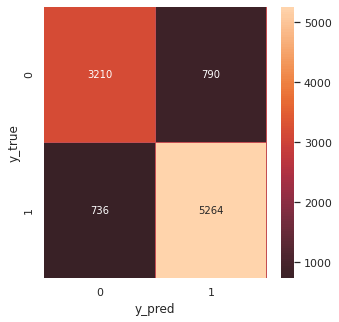

In [66]:
error_svc_opt_feed = evaluar_feedback(svc_o_feed, X_stemm_train, X_stemm_test, y_feed_train, y_feed_test)

No encontramos mejora notable entre el modelo LinearSVC y su versión optimizada para el texto con metodo stemming.

# Conclusiones

**Feature Importances**
Estudiamos para los modelos optimizados cuales son la features que usa el modelo para predecir.

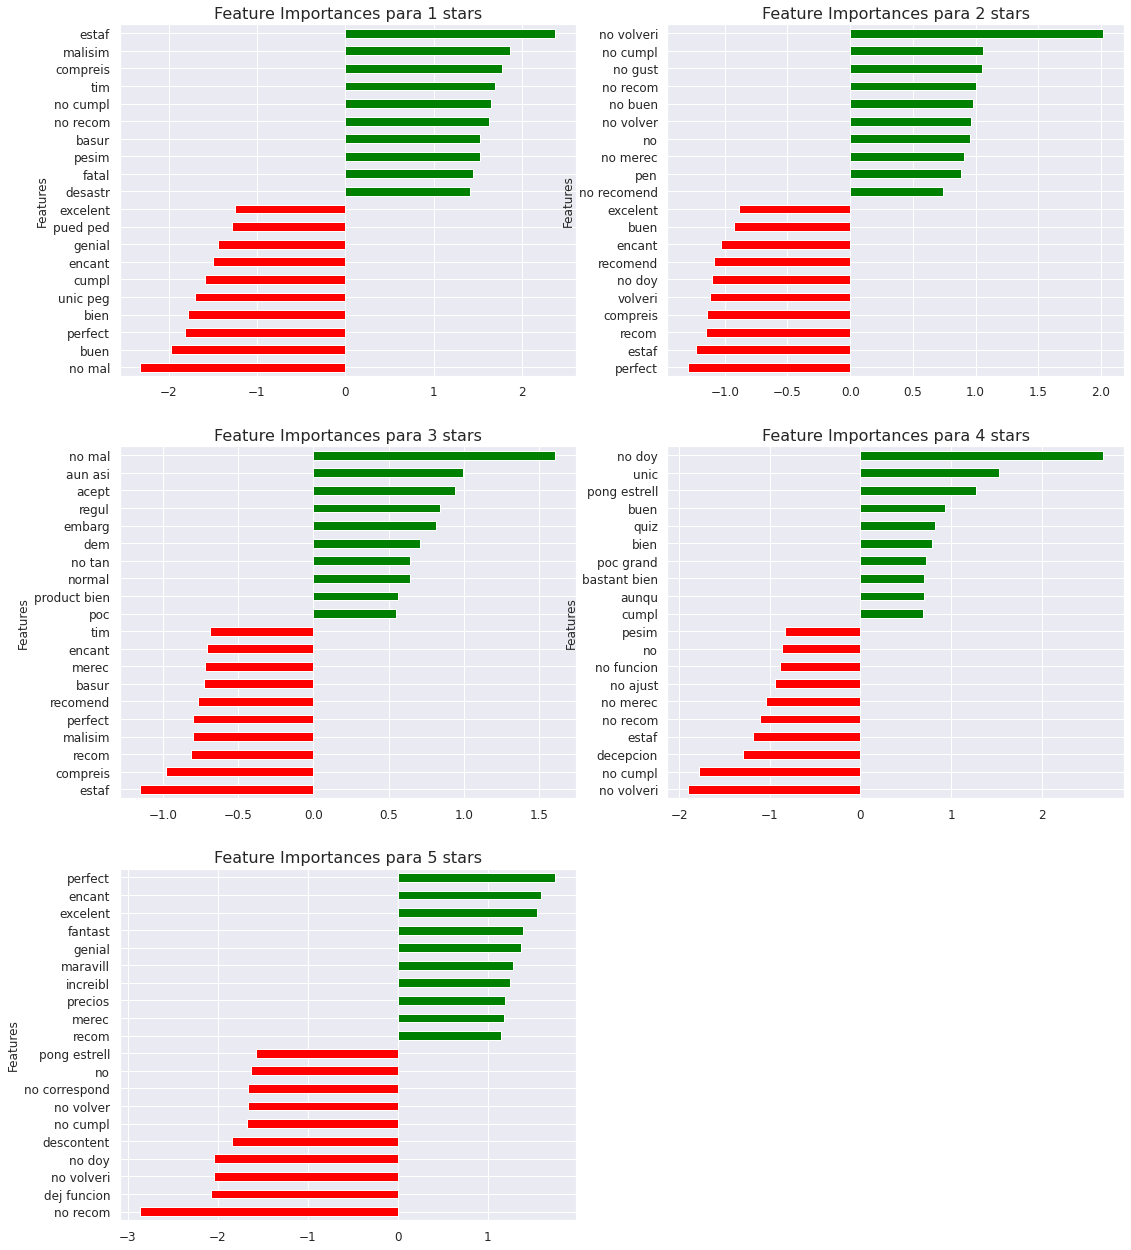

In [73]:
plt.figure(figsize = (18,22))
all_words = tfidf_stemm.get_feature_names()
for n_star in range (0,5):
    
    coeff = list(svc_o.coef_[n_star])
    labels = list(all_words)

    features = pd.DataFrame()
    features['Features'] = labels
    features['Importance'] = coeff
    features = features.reset_index(drop=True)
    features_sort = features.sort_values(by=['Importance'], ascending=True)
    features_sort = features_sort.reset_index(drop=True)
    
    plt.subplot(3, 2, n_star+1)
    data_plot = pd.concat([features_sort.head(10), features_sort.tail(10)])
    data_plot.sort_values(by=['Importance'], ascending=True, inplace = True)
    data_plot['positive'] = data_plot['Importance'] > 0
    data_plot.set_index('Features', inplace = True)
    data_plot.Importance.plot(kind='barh', 
                              color = data_plot.positive.map({True: 'green', False: 'red'}),
                              fontsize=12)
    
    
    
    plt.title ('Importancia de los features ', fontsize=16)
    plt.title ('Feature Importances para ' + str(n_star+1) + ' stars', fontsize=16)
plt.show()

Aunque vemos las palabras stemmizadas podemos apreciar cuales usa el modelo LinearSVC stemmizado con target stars en cada clase de la variable target.

# Investigación

Dejamos a modo de lista posibles caminos a explorar en un futuro avance del trabajo. Implementamos una prueba rápida de una red neuronal y mostramos resultados preliminares.



*   Análisis de Sentimientos / Lexicones / https://github.com/alaBay94/SentimentAnalysis
*   Word2vec / https://python-apuntes.blogspot.com/2021/01/classificador-con-word2vec.html
*   Redes neuronales / https://www.youtube.com/watch?v=fNxaJsNG3-s
*   Arxiv paper Amazon reviews Multilingual / https://arxiv.org/abs/2010.02573





## Tokenizer with TensorFlow

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
sentences = data.text_stem

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
#print(word_index)
print('Cantidad de palabras en el index formado por text_stem:', len(word_index.keys()))


sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences)

#print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)

Cantidad de palabras en el index formado por title: 22618

Padded Sequences:
[[   0    0    0 ...   76  591  385]
 [   0    0    0 ...  111 1081  208]
 [   0    0    0 ...  876  388  772]
 ...
 [   0    0    0 ...    4  271    5]
 [   0    0    0 ...   10   23  118]
 [   0    0    0 ...   53  337  110]]


In [ ]:
len(sequences[0])

9

In [ ]:
len(padded[18380])

245

In [ ]:
len(padded)

200000

In [ ]:
df = pd.DataFrame(padded).T

In [ ]:
#data['padded_title'] = pd.DataFrame(padded).T

In [ ]:
df.shape

(245, 200000)

In [ ]:
pd.DataFrame(padded).T.shape

(28, 200000)

###Neural Network

In [ ]:
vocab_size = 100000
embedding_dim = 160
max_length = 600
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
data_shuffle = data[['text_stem','stars']].sample(frac=1).reset_index(drop=True)

In [ ]:
sentences = data_shuffle.text_stem
labels = 0.25*(data_shuffle.stars -1)

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
training_labels.min()

0.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 160)          16000000  
_________________________________________________________________
global_average_pooling1d_2 ( (None, 160)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                8050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 16,008,101
Trainable params: 16,008,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/15
625/625 - 119s - loss: 0.6692 - accuracy: 0.2587 - val_loss: 0.5789 - val_accuracy: 0.3660
Epoch 2/15
625/625 - 115s - loss: 0.5411 - accuracy: 0.3814 - val_loss: 0.5334 - val_accuracy: 0.3800
Epoch 3/15
625/625 - 115s - loss: 0.5200 - accuracy: 0.3880 - val_loss: 0.5340 - val_accuracy: 0.3765
Epoch 4/15
625/625 - 115s - loss: 0.5121 - accuracy: 0.3911 - val_loss: 0.5294 - val_accuracy: 0.3805
Epoch 5/15
625/625 - 114s - loss: 0.5053 - accuracy: 0.3918 - val_loss: 0.5216 - val_accuracy: 0.3823
Epoch 6/15
625/625 - 115s - loss: 0.4988 - accuracy: 0.3927 - val_loss: 0.5175 - val_accuracy: 0.3824
Epoch 7/15
625/625 - 114s - loss: 0.4933 - accuracy: 0.3935 - val_loss: 0.5181 - val_accuracy: 0.3816
Epoch 8/15
625/625 - 114s - loss: 0.4887 - accuracy: 0.3944 - val_loss: 0.5147 - val_accuracy: 0.3818
Epoch 9/15
625/625 - 115s - loss: 0.4845 - accuracy: 0.3953 - val_loss: 0.5142 - val_accuracy: 0.3815
Epoch 10/15
625/625 - 115s - loss: 0.4803 - accuracy: 0.3952 - val_loss: 0.5171 - 

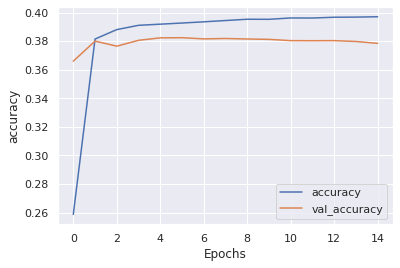

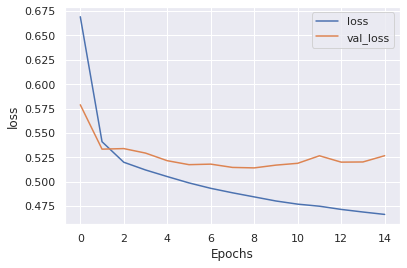

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Anexos

***Descargamos los modelos fiteados:***


In [74]:
import pickle

In [75]:
# save the model to disk
file_SVC = 'svc_o.sav'
pickle.dump(svc_o, open(file_SVC, 'wb'))

In [76]:
# save the model to disk
file_SVC_feed = 'svc_o_feed.sav'
pickle.dump(svc_o_feed, open(file_SVC_feed, 'wb'))

In [77]:
# save the model to disk
file_tfidf = 'tfidf_stemm.sav'
pickle.dump(tfidf_stemm, open(file_tfidf, 'wb'))

In [79]:
pickle.dump(clf, open('svc_pre.sav', 'wb'))

In [80]:
pickle.dump(clf_pre_feed, open('svc_pre_feed.sav', 'wb'))

In [81]:
pickle.dump(tfidf_pre, open('tfidf_pre.sav', 'wb'))